I want to predict the statistics of teams that will win march madness. 


3. the only columns with non-normal distribution were: games, barthage, postseason, year, and seed

the column "POSTSEASON" has NA values, so i changed the value to 0 and created categories for each finishing position, but I combined classes so that there would be more entries per class. 
I did not use any of my categorical columns besides the POSTSEASON column, where I created a data dictionary to align the placement with a number ("WINNER" = 1, "2nd" = 2, etc.)

I chose to look at the BARTHAG column, which is a power rating system that looks at teams likelihoods to beat other teams in basketball. I removed all entries under 60% as this was the median for teams that lost in the first round of the tournament. 
I used a standard scaler method to scale my numbers, as this allowed for different stats to be counted on the same scale. 

the model is 53% accurate, with high bias towards class 0, as this class had a high volume of entries. The model fails to predict any correct answers for classes other than 0. This shows a lot of underfitting, which makes sense, as the training data contained teams in class 0 as opposed to the others. there is high variance as the f1 scores, precision, and recall are all 0 for other classes. 

After completeting this project, it would make more sense to try and predict who would make the tournament but I didn't want to redo my answers. 

In [190]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

rawDf = pd.read_csv("basketball data.csv")
rawDf

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023


In [191]:
rawDf.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,...,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,680.000000,3523.000000
mean,30.486233,15.990633,103.151320,103.153250,0.494067,49.887823,50.087113,18.696509,18.625092,29.308544,...,34.529066,34.802555,49.112433,49.289299,34.185580,34.369316,67.735339,-7.579620,8.801471,2017.828555
std,3.951584,6.572893,7.264859,6.511989,0.255338,3.078505,2.894967,2.104119,2.241067,4.214131,...,5.514264,6.396757,3.400389,3.317012,2.729186,2.435546,3.091703,6.815976,4.673461,3.257824
min,5.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,14.400000,...,19.600000,16.500000,37.700000,37.700000,24.900000,26.100000,57.200000,-25.200000,1.000000,2013.000000
25%,29.000000,11.000000,98.200000,98.400000,0.281300,47.900000,48.100000,17.300000,17.100000,26.500000,...,30.600000,30.200000,46.800000,47.100000,32.300000,32.700000,65.700000,-12.600000,5.000000,2015.000000
50%,31.000000,16.000000,102.800000,103.200000,0.475600,49.800000,50.100000,18.600000,18.500000,29.400000,...,34.300000,34.100000,49.000000,49.300000,34.100000,34.300000,67.700000,-7.900000,9.000000,2018.000000
75%,33.000000,21.000000,107.900000,107.800000,0.714250,51.900000,52.000000,20.000000,20.100000,32.100000,...,38.100000,38.800000,51.300000,51.500000,36.000000,36.000000,69.700000,-3.000000,13.000000,2021.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,61.000000,60.100000,27.100000,28.500000,43.600000,...,58.600000,60.700000,64.000000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2023.000000


Drop columns like team name, conference to avoid columns that will not affect winning a championship

In [192]:
cleanedDf = rawDf.drop(columns=['TEAM', 'CONF', 'WAB', 'SEED'])
cleanedDf

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,POSTSEASON,YEAR
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,2ND,2016
1,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,2ND,2015
2,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,2ND,2018
3,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,2ND,2019
4,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,2ND,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,18.3,29.8,30.9,34.4,27.5,54.6,52.1,39.7,36.1,69.5,NaN,2023
3519,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,18.9,25.3,20.2,26.2,27.8,56.4,48.6,36.4,33.6,64.4,NaN,2023
3520,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,16.3,28.9,29.1,35.6,28.7,52.5,42.8,33.4,31.1,69.8,NaN,2023
3521,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,19.3,35.8,29.3,35.7,28.9,48.8,47.2,35.6,31.6,70.7,NaN,2023


In [193]:
cleanedDf.isna().sum()

G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
POSTSEASON    2843
YEAR             0
dtype: int64

In [194]:
# Fill missing values in 'POSTSEASON' column with 'Not Applicable'
cleanedDf['POSTSEASON'].fillna('Not Applicable', inplace=True)

# Define the mapping for combining classes
place_mapping_combined = {
    "Not Applicable": 0,
    "Champions": 1,
    "2ND": 1,  # Combine with class 1 (Champions)
    "F4": 3,
    "E8": 3,   # Combine with class 3 (F4)
    "S16": 5,
    "R32": 5,  # Combine with class 5 (S16)
    "R64": 7,
    "R68": 7,  # Combine with class 7 (R64)
}

# Map 'POSTSEASON' to the combined classes
cleanedDf['POSTSEASON_results'] = cleanedDf['POSTSEASON'].map(place_mapping_combined)

# Display the modified DataFrame
cleanedDf


,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,POSTSEASON,YEAR,POSTSEASON_results
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,...,32.3,30.4,53.9,44.6,32.7,36.2,71.7,2ND,2016,1
1,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,...,36.2,22.4,54.8,44.7,36.5,37.5,59.3,2ND,2015,1
2,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,...,30.7,30.0,54.7,46.8,35.2,33.2,65.9,2ND,2018,1
3,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,...,32.9,36.6,52.8,41.9,36.5,29.7,67.5,2ND,2019,1
4,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,...,39.0,26.9,56.3,40.0,38.2,29.0,71.5,2ND,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,18.3,29.8,...,34.4,27.5,54.6,52.1,39.7,36.1,69.5,Not Applicable,2023,0
3519,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,18.9,25.3,...,26.2,27.8,56.4,48.6,36.4,33.6,64.4,Not Applicable,2023,0
3520,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,16.3,28.9,...,35.6,28.7,52.5,42.8,33.4,31.1,69.8,Not Applicable,2023,0
3521,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,19.3,35.8,...,35.7,28.9,48.8,47.2,35.6,31.6,70.7,Not Applicable,2023,0


In [195]:
cleanedDf.drop(columns=['POSTSEASON'], inplace=True)
cleanedDf

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,YEAR,POSTSEASON_results
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,2016,1
1,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,2015,1
2,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,2018,1
3,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,2019,1
4,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,18.3,29.8,30.9,34.4,27.5,54.6,52.1,39.7,36.1,69.5,2023,0
3519,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,18.9,25.3,20.2,26.2,27.8,56.4,48.6,36.4,33.6,64.4,2023,0
3520,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,16.3,28.9,29.1,35.6,28.7,52.5,42.8,33.4,31.1,69.8,2023,0
3521,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,19.3,35.8,29.3,35.7,28.9,48.8,47.2,35.6,31.6,70.7,2023,0


In [196]:
def makeHistogram(cleanedDf, colName, width, height):
    """This function generates a bar chart with the value count for all values of a given
       and dataframe

    Args:
        myDF (DataFrame): Dataframe of Data
        colName (String): Name of Column in DataFrame
        width (float): width of figure
        height (float): height of figure
    """
    plt.figure(figsize=(width, height))
    plt.hist(cleanedDf[colName])
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"Distribution of {colName} Column", y=1.02)

In [197]:
#using power ratings on a percent scale out of 100 to normalize

cleanedDf['BARTHAG'] = rawDf['BARTHAG']*100
cleanedDf.head()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,YEAR,POSTSEASON_results
0,40,33,123.3,94.9,95.31,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,2016,1
1,40,36,129.1,93.6,97.58,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,2015,1
2,40,33,114.4,90.4,93.75,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,2018,1
3,38,31,115.2,85.2,96.96,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,2019,1
4,39,37,117.8,86.3,97.28,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,2017,1


In [198]:
cleanedDf = cleanedDf[cleanedDf['BARTHAG'] >= 60]
cleanedDf.head()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,YEAR,POSTSEASON_results
0,40,33,123.3,94.9,95.31,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,2016,1
1,40,36,129.1,93.6,97.58,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,2015,1
2,40,33,114.4,90.4,93.75,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,2018,1
3,38,31,115.2,85.2,96.96,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,2019,1
4,39,37,117.8,86.3,97.28,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,2017,1


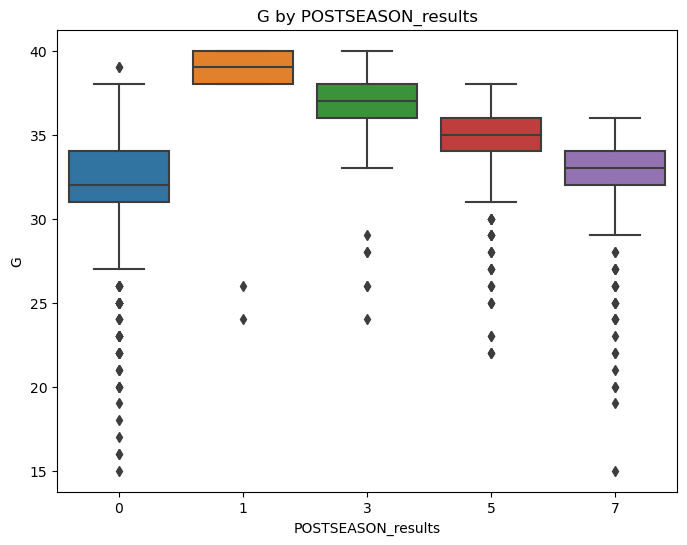

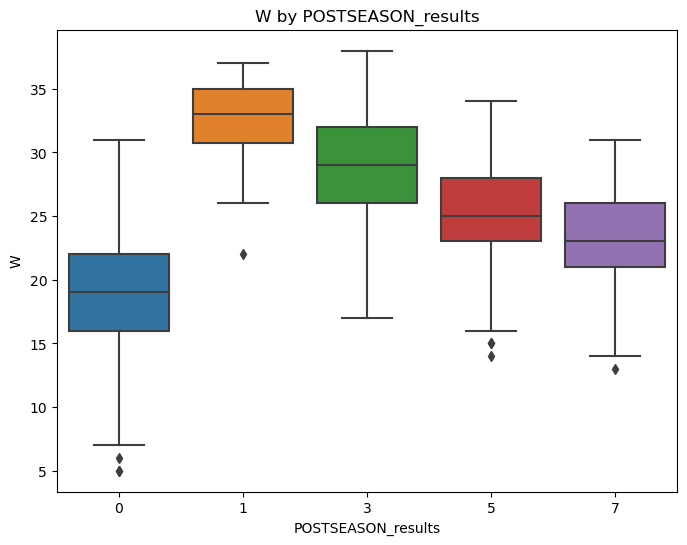

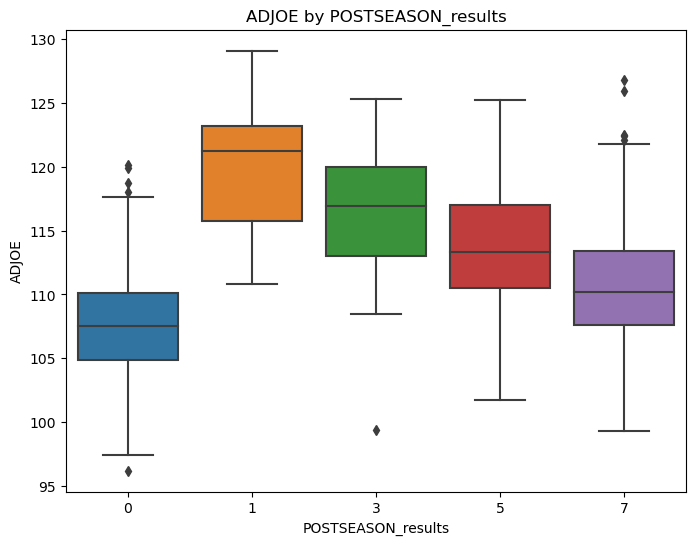

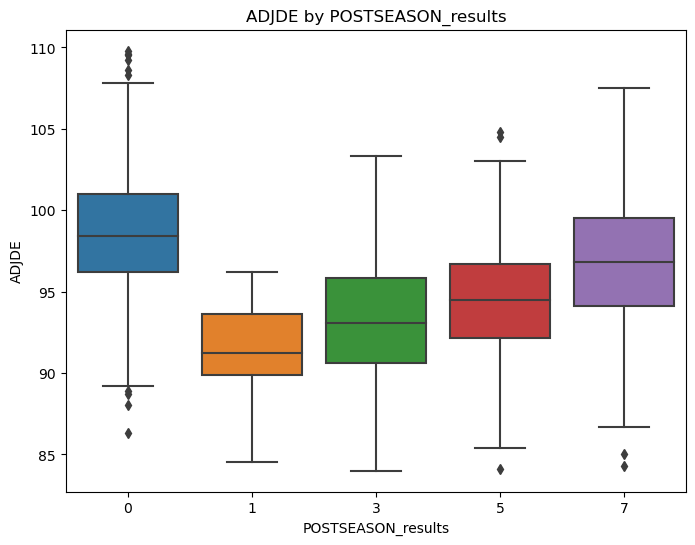

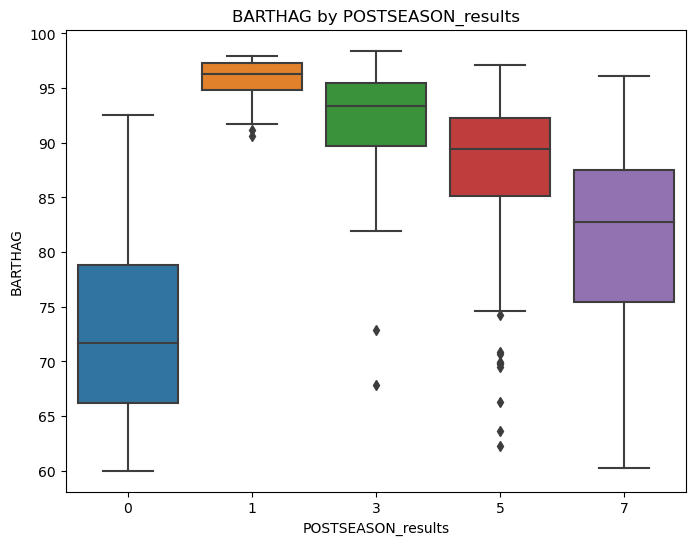

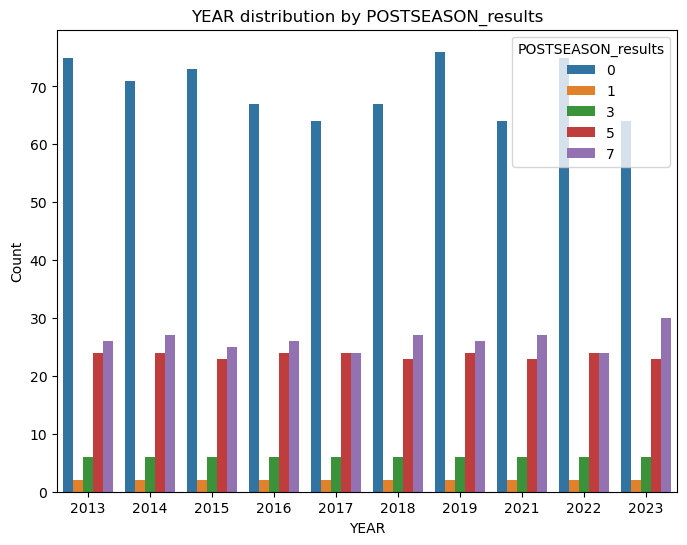

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cleanedDf' is your DataFrame

# Descriptive statistics for each class
class_statistics = cleanedDf.groupby('POSTSEASON_results').describe()

# Visualize numerical features
numerical_features = ['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG']  # Example numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='POSTSEASON_results', y=feature, data=cleanedDf)
    plt.title(f'{feature} by POSTSEASON_results')
    plt.xlabel('POSTSEASON_results')
    plt.ylabel(feature)
    plt.show()

# Visualize categorical features
categorical_features = ['YEAR']  # Example categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='POSTSEASON_results', data=cleanedDf)
    plt.title(f'{feature} distribution by POSTSEASON_results')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


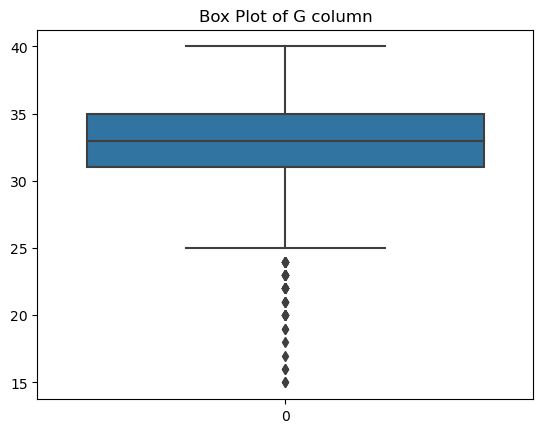

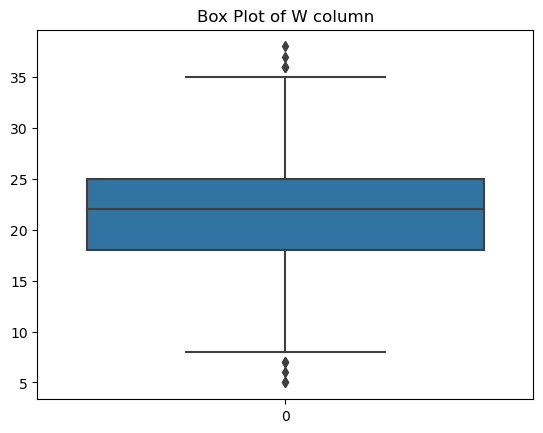

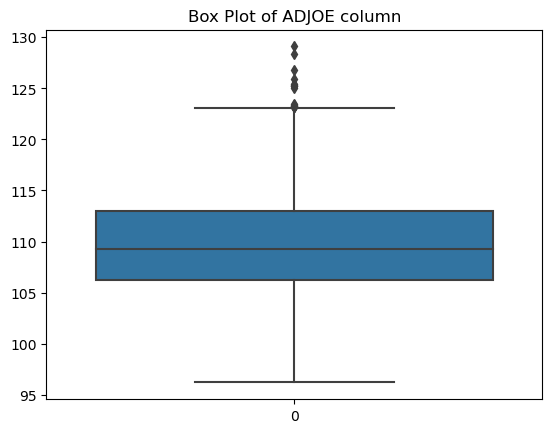

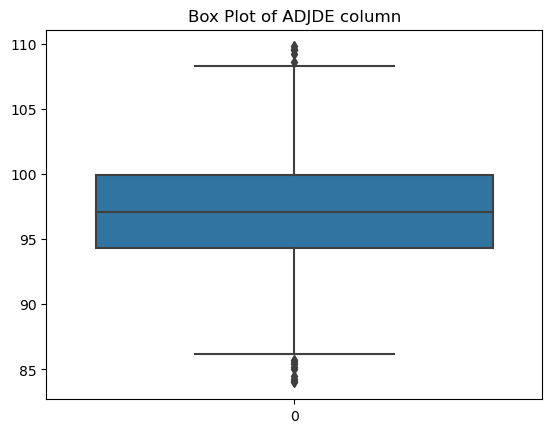

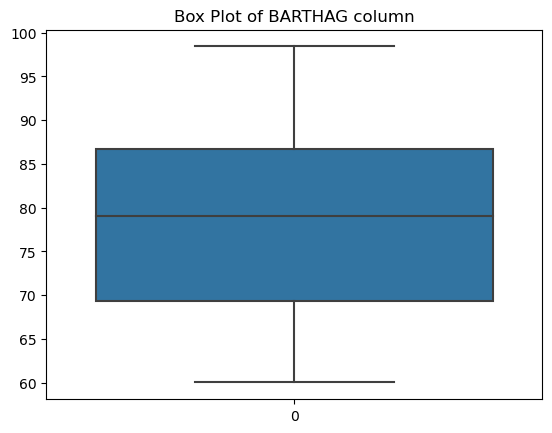

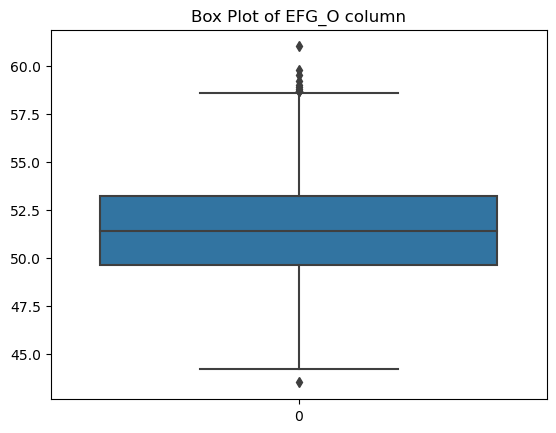

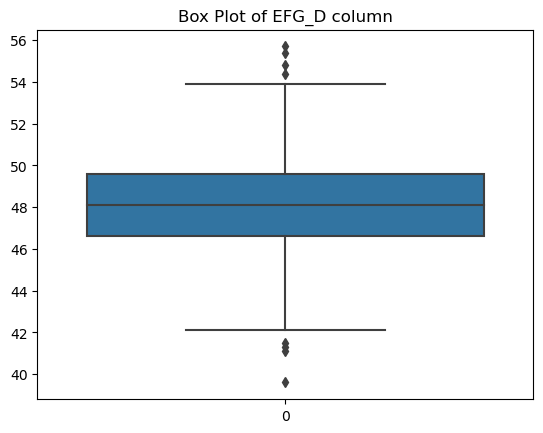

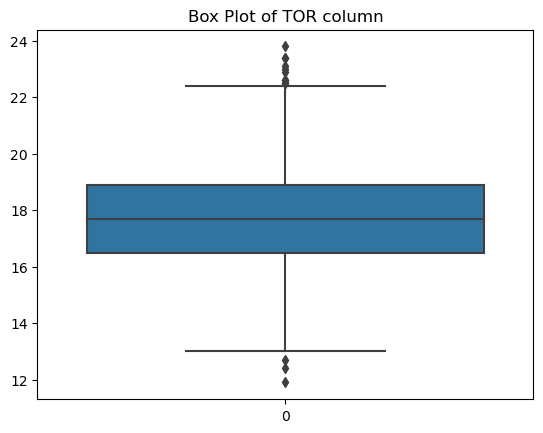

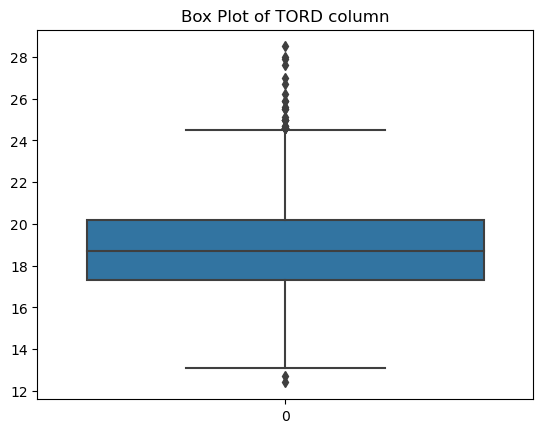

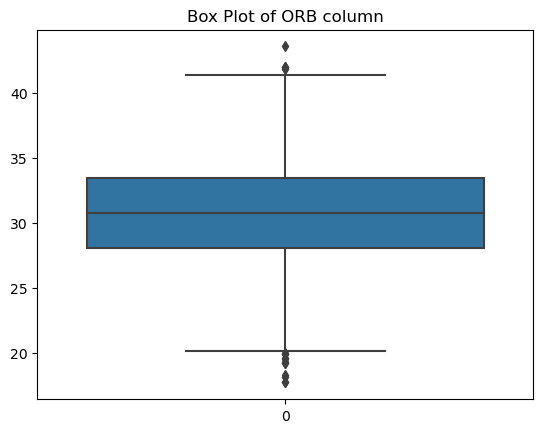

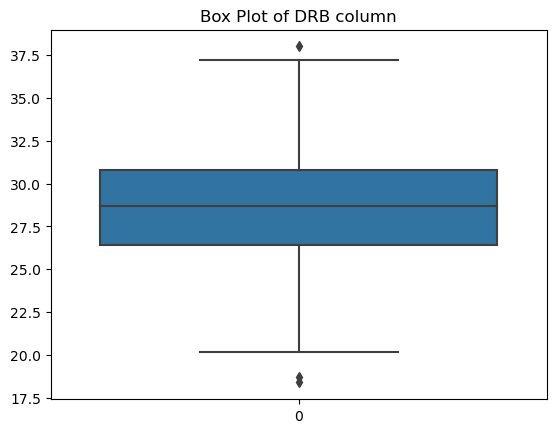

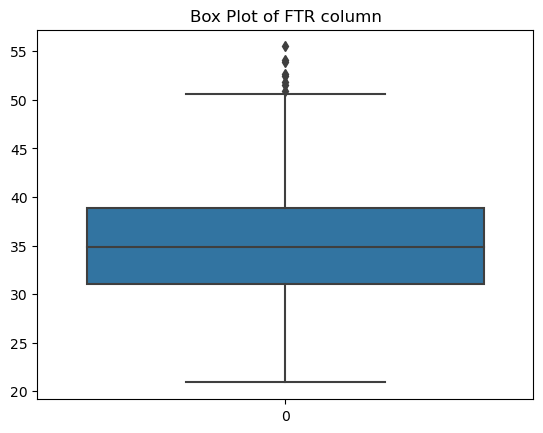

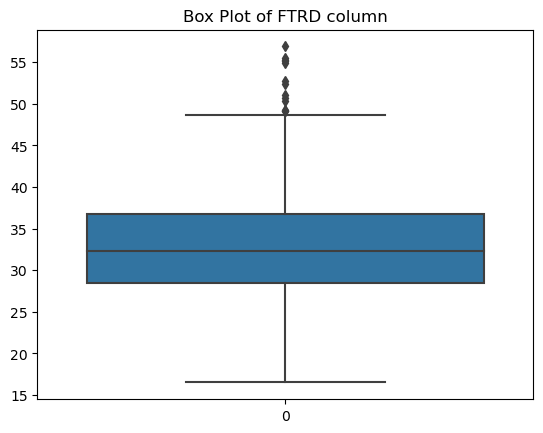

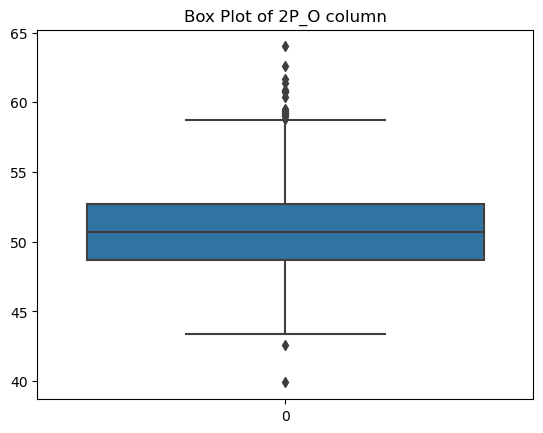

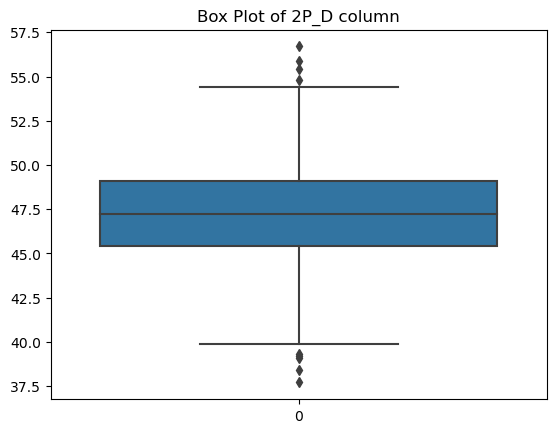

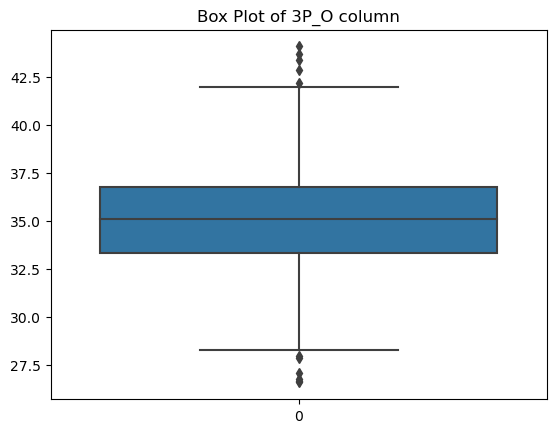

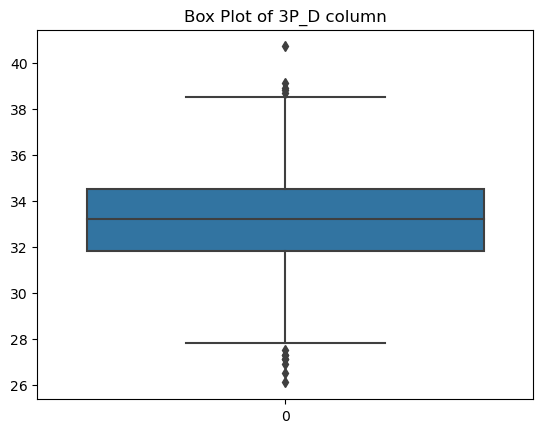

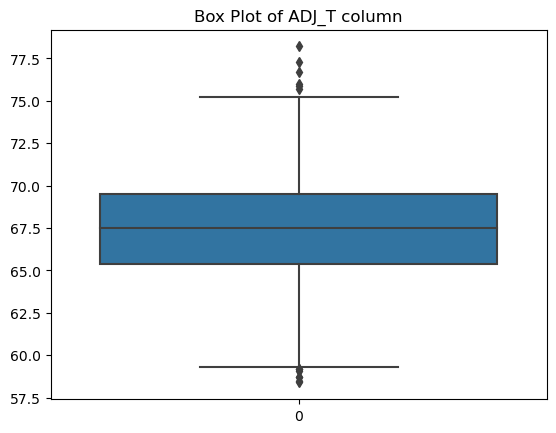

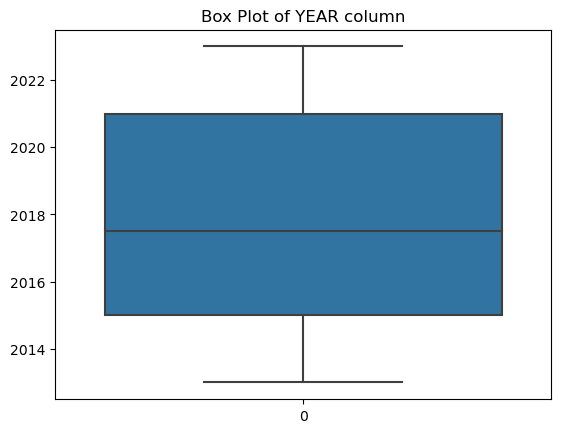

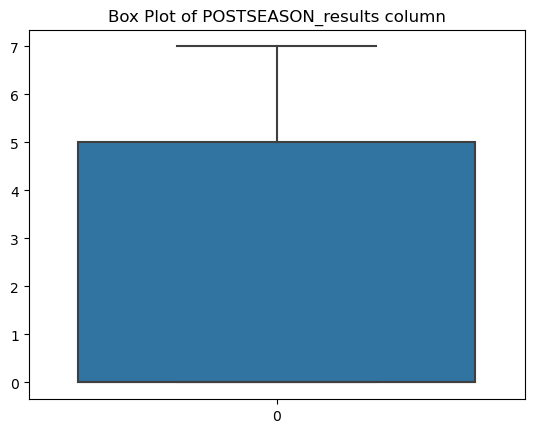

In [200]:
for col in cleanedDf.columns:
    plt.figure()
    sns.boxplot(cleanedDf[col])
    plt.title(f"Box Plot of {col} column")

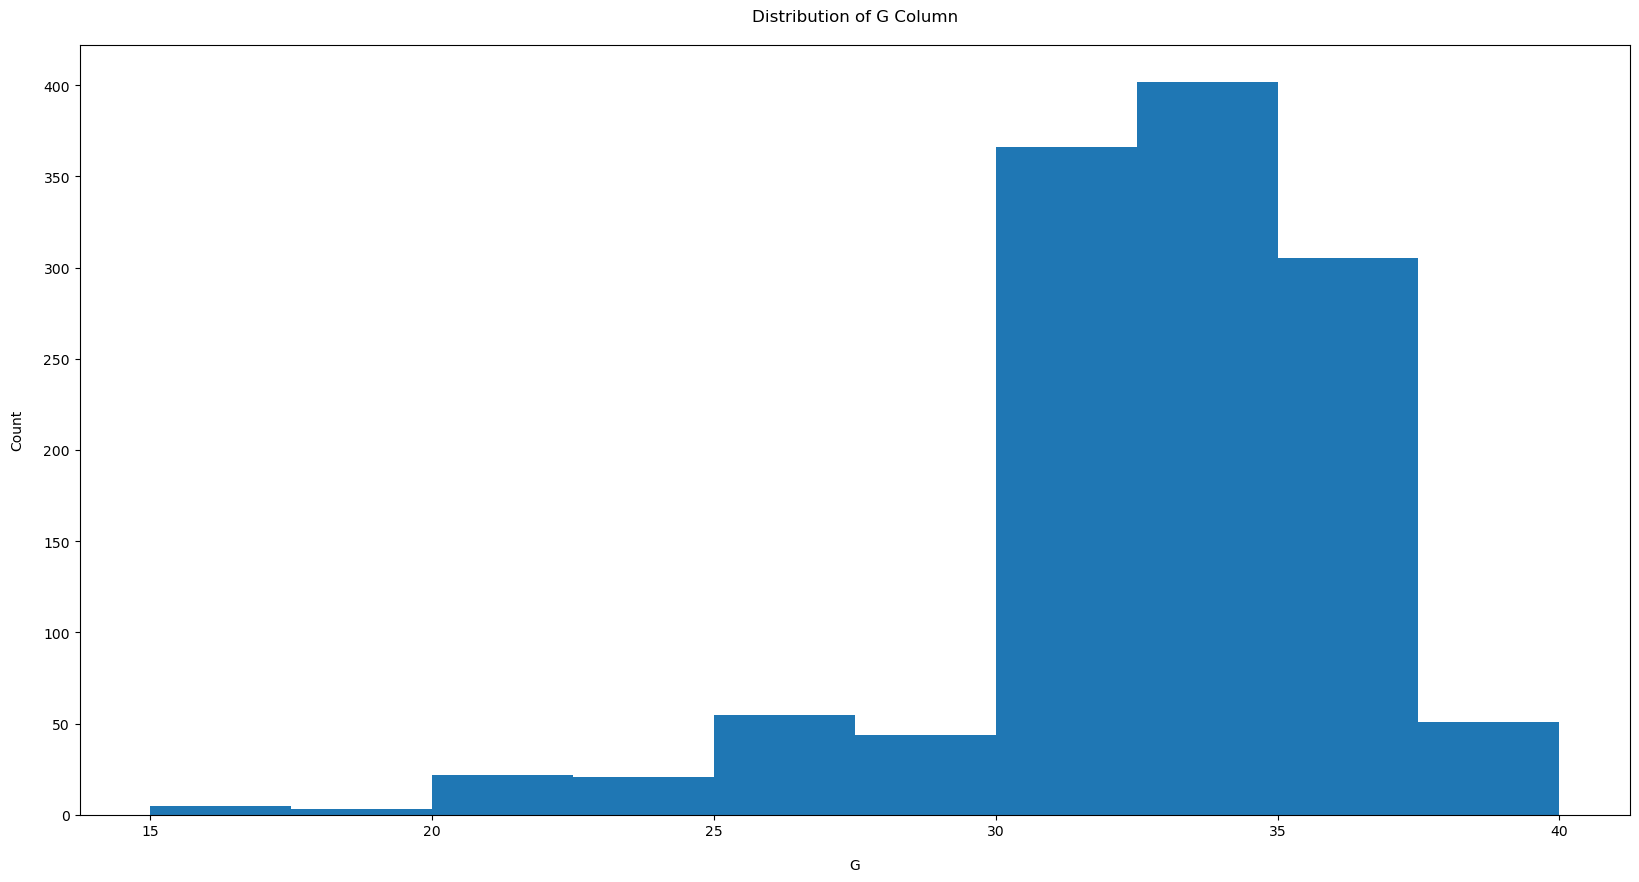

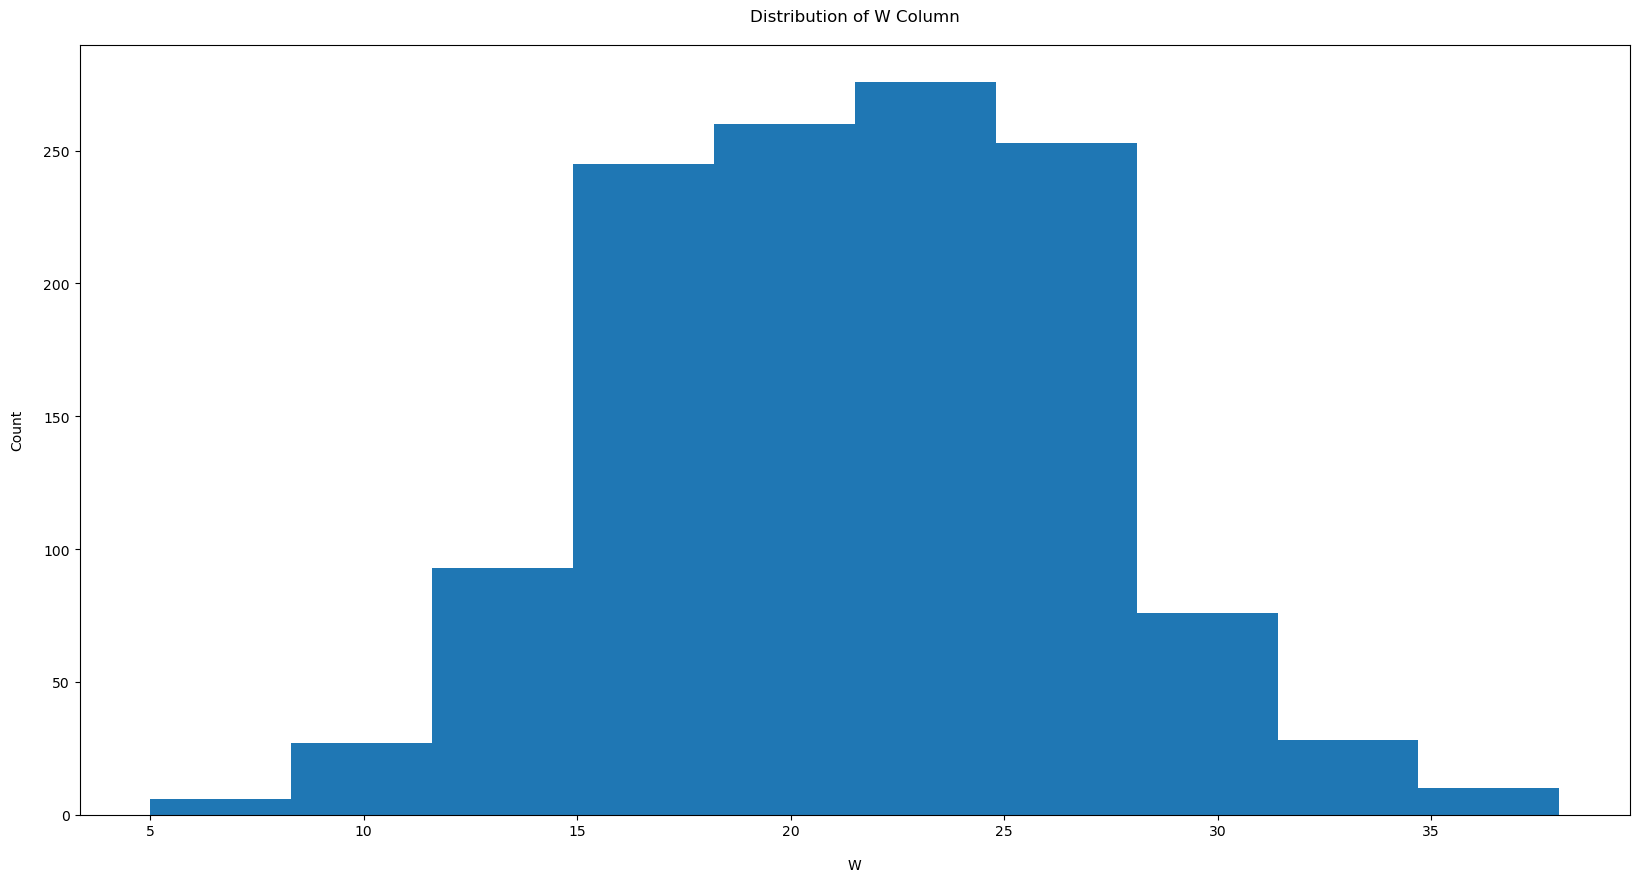

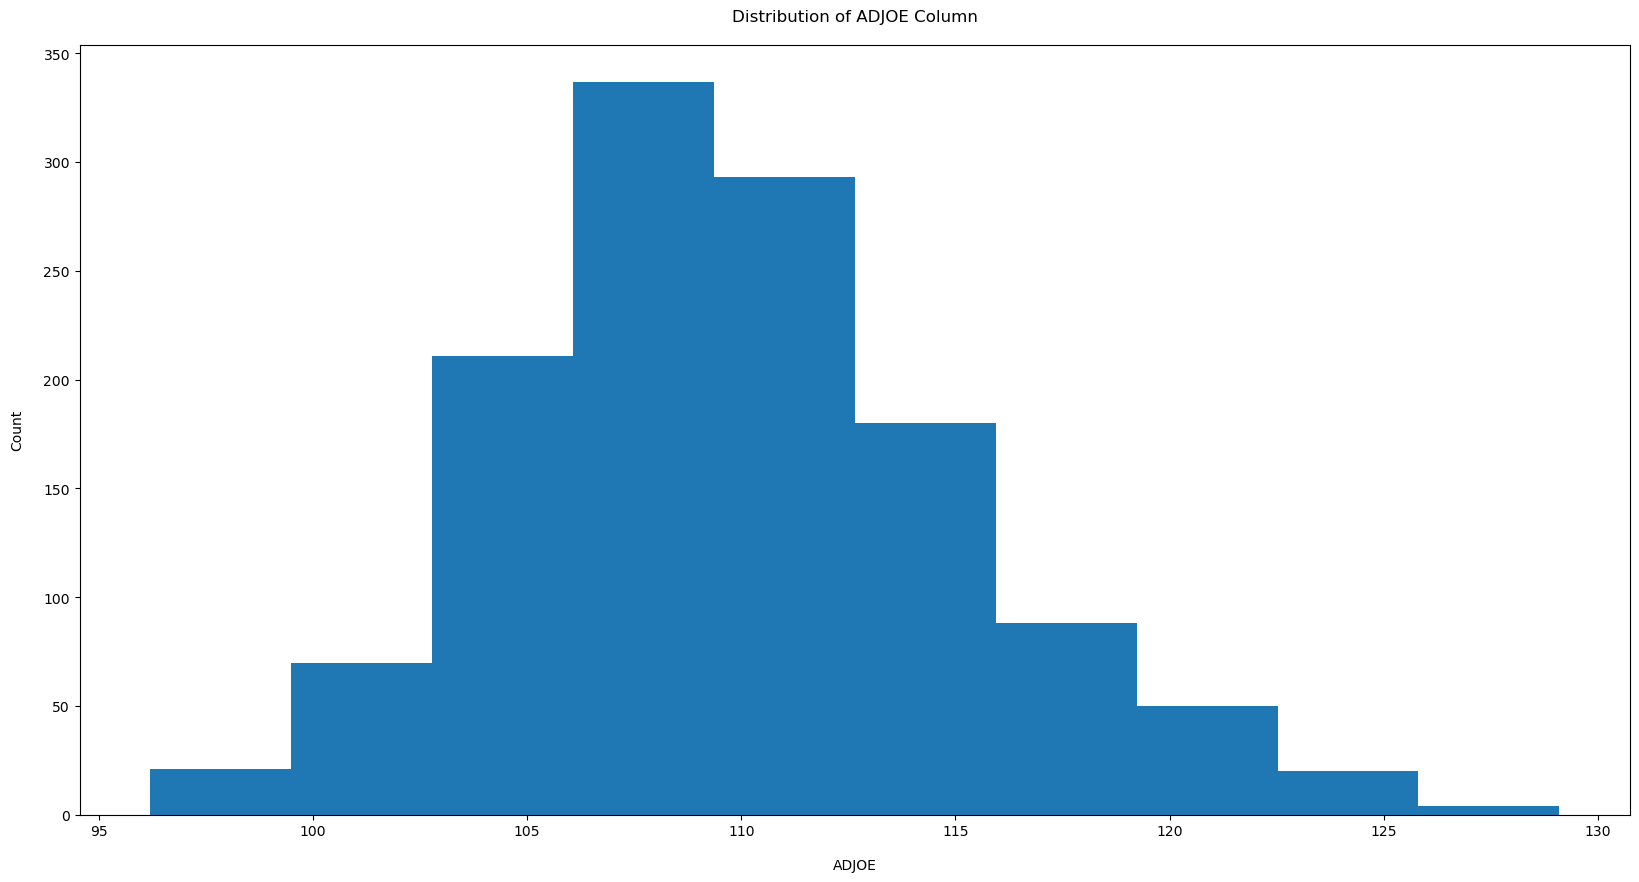

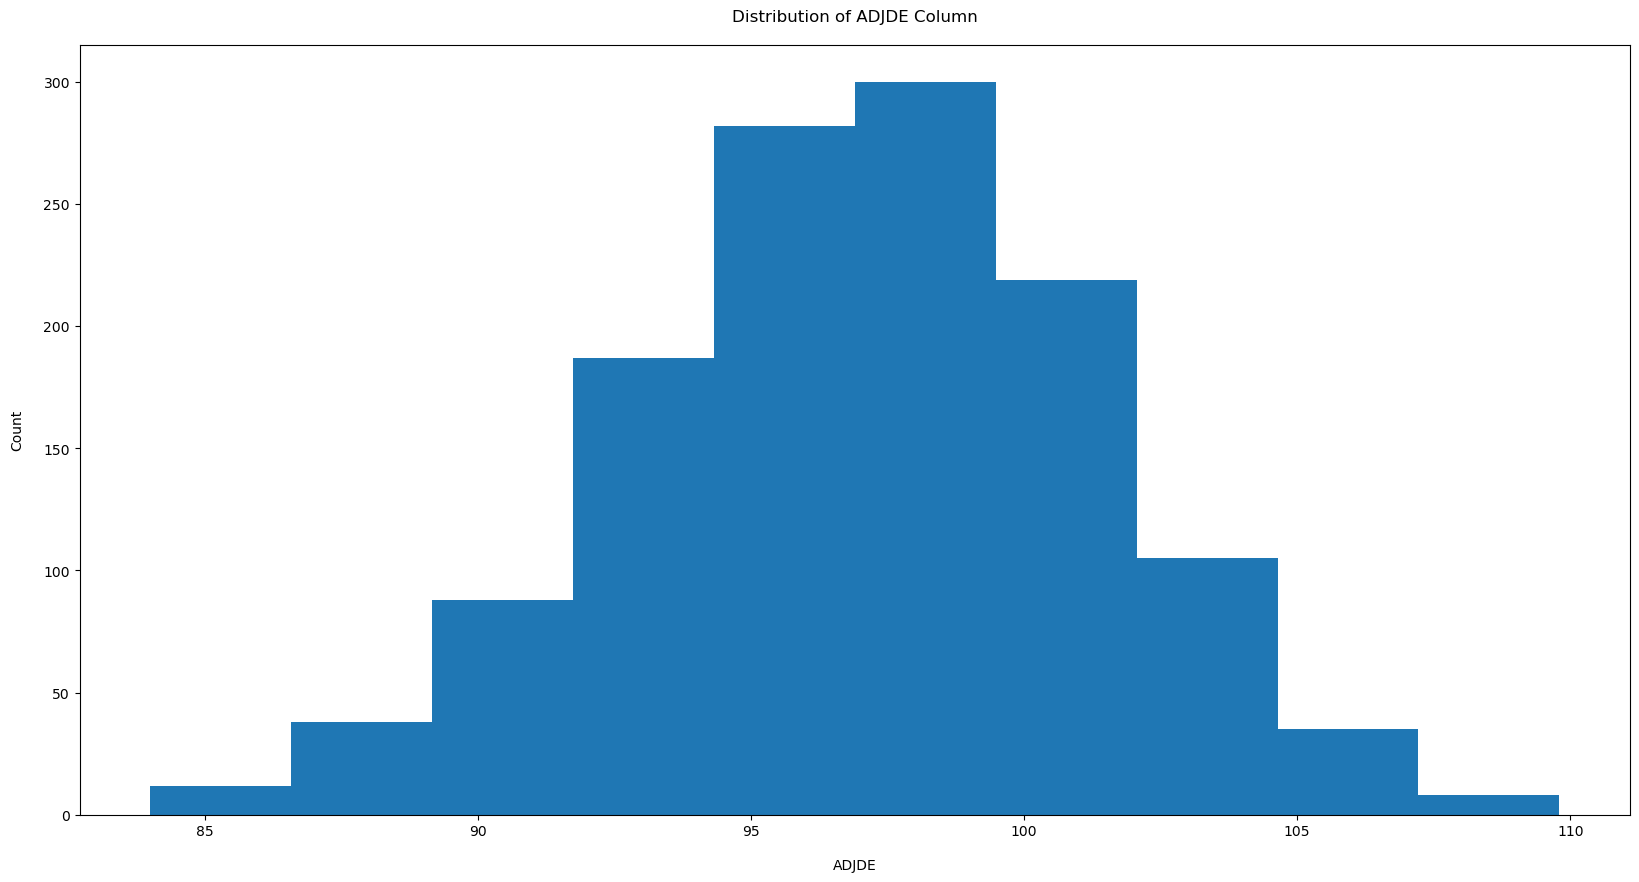

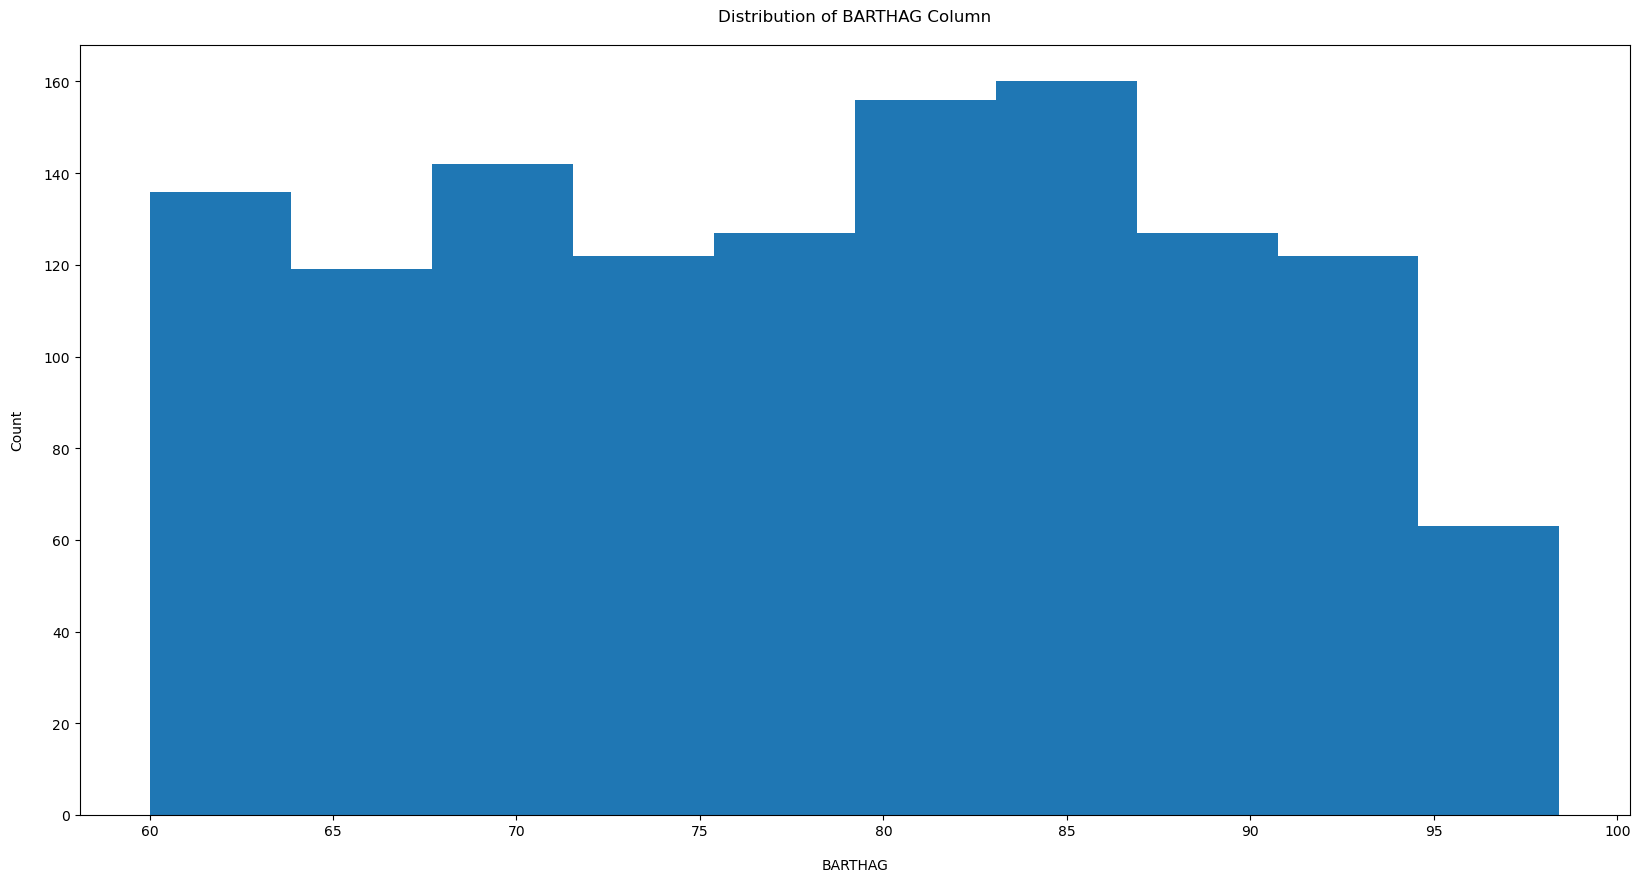

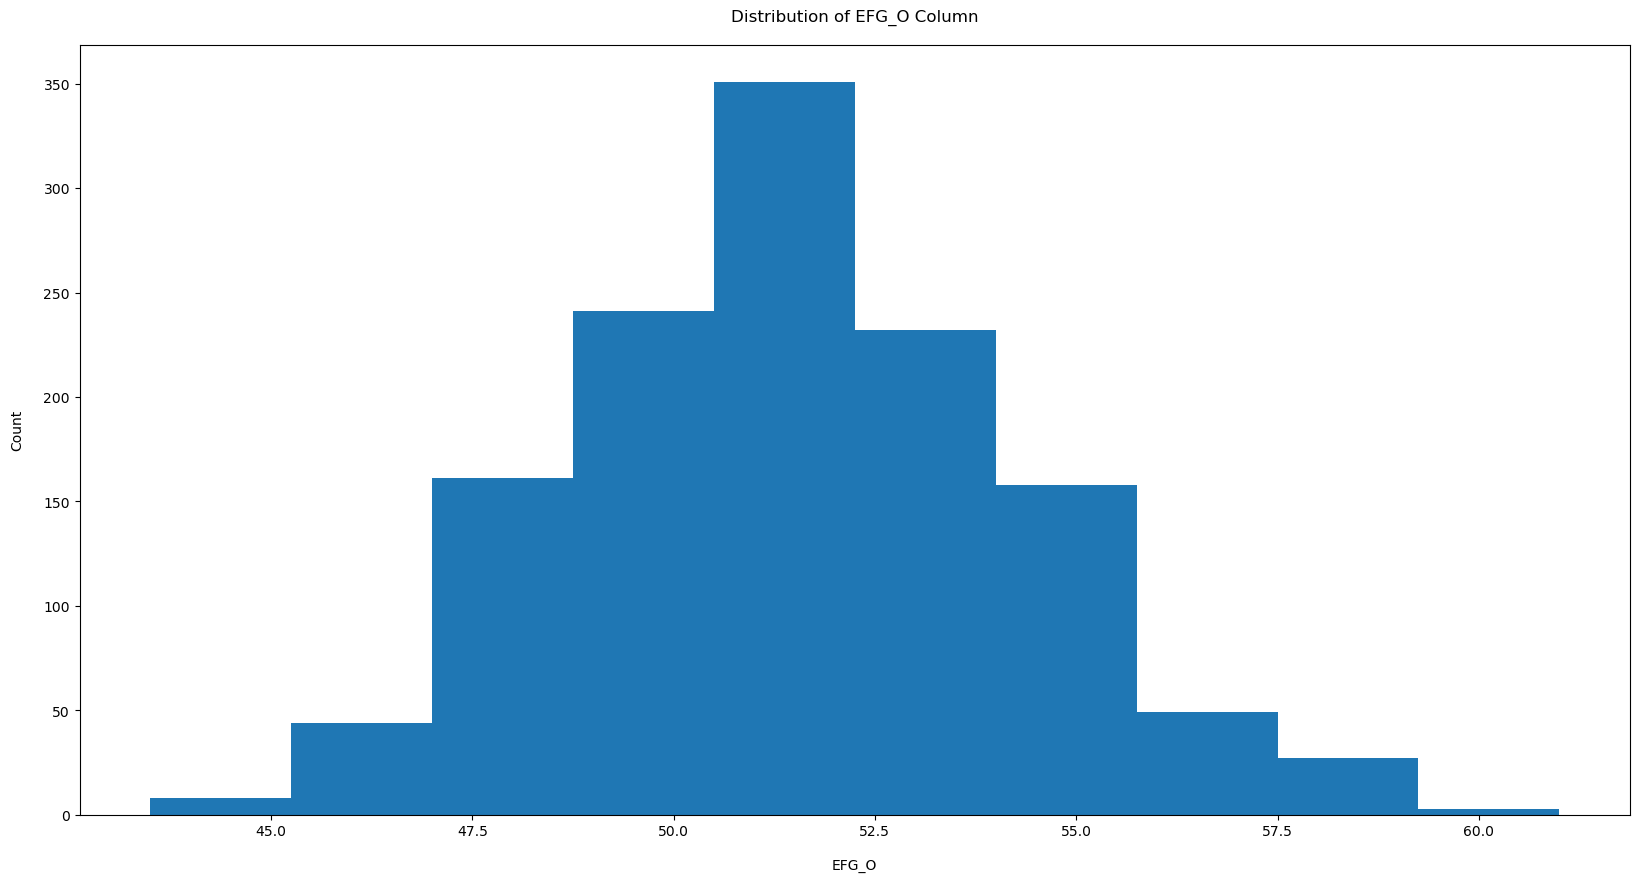

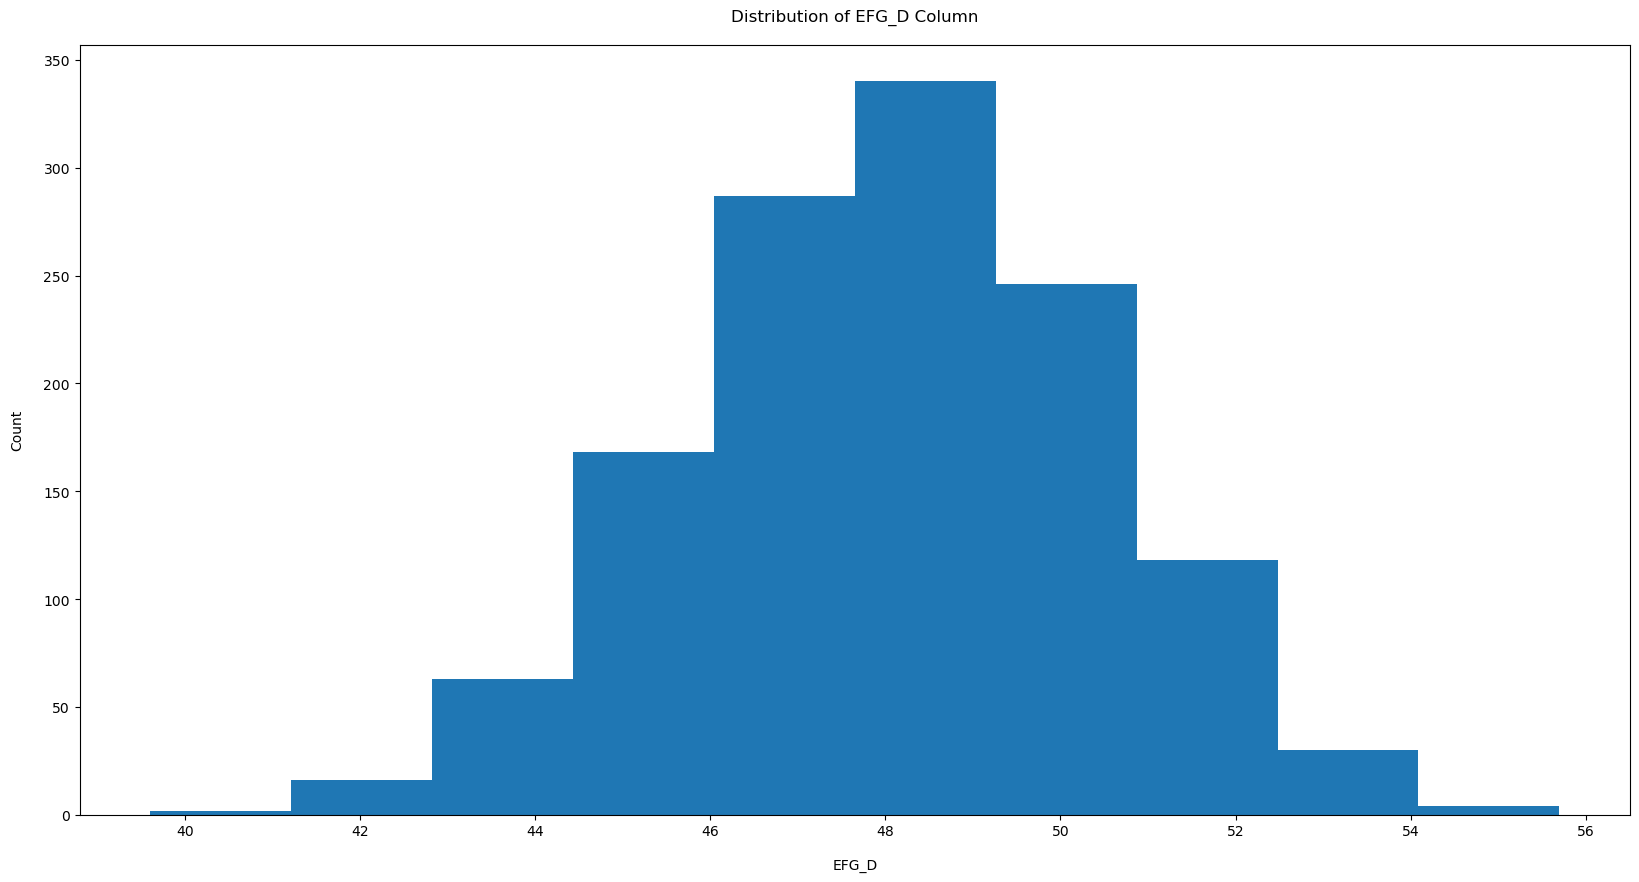

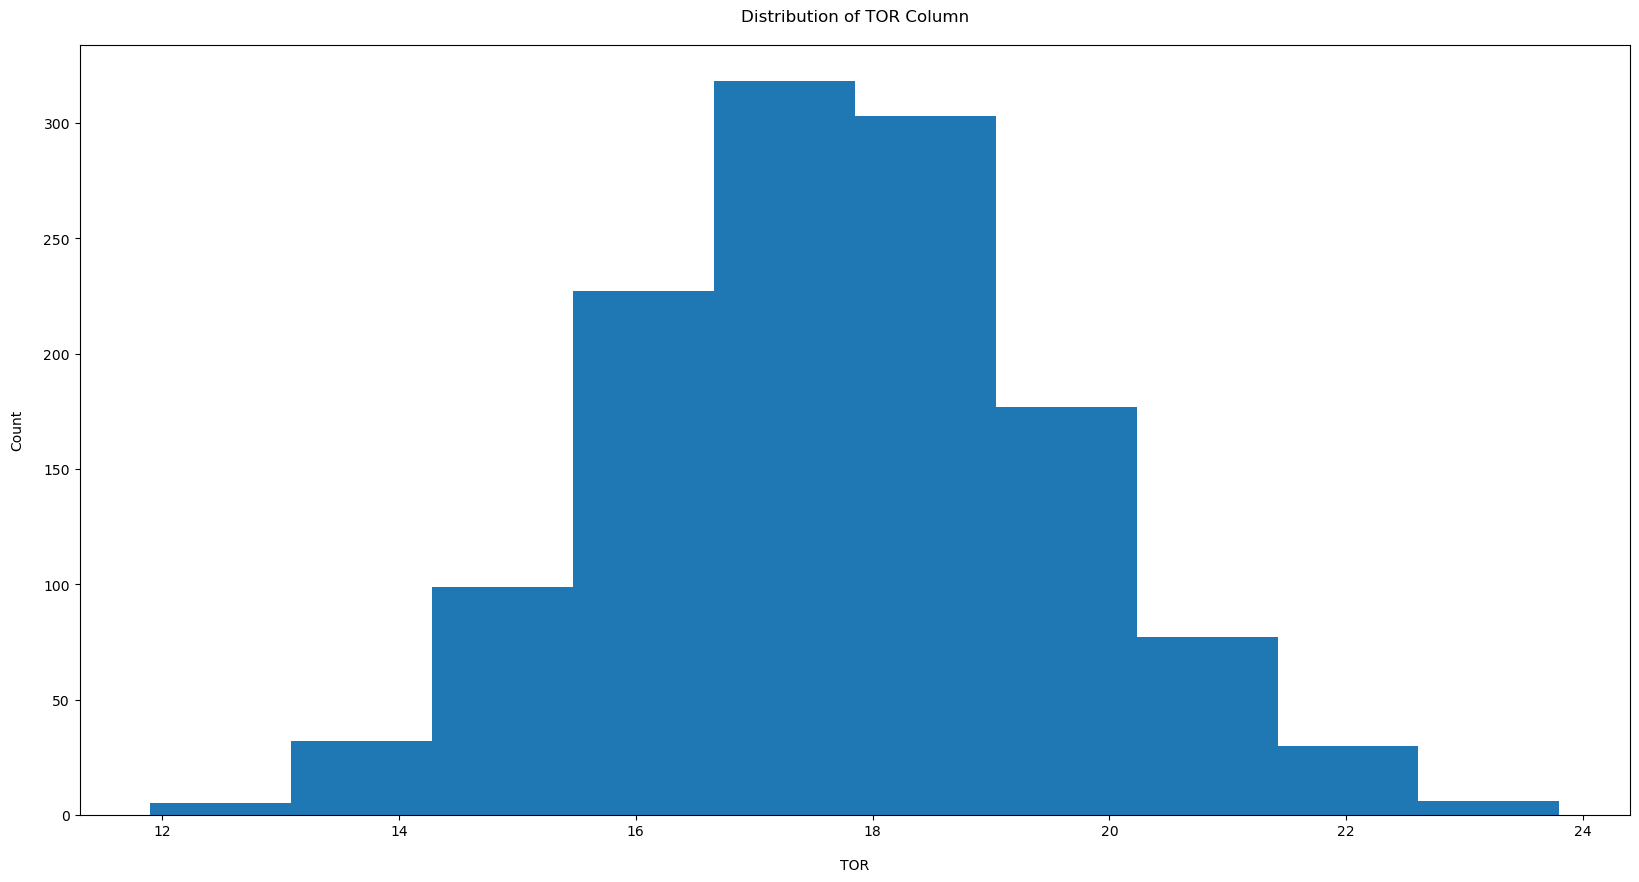

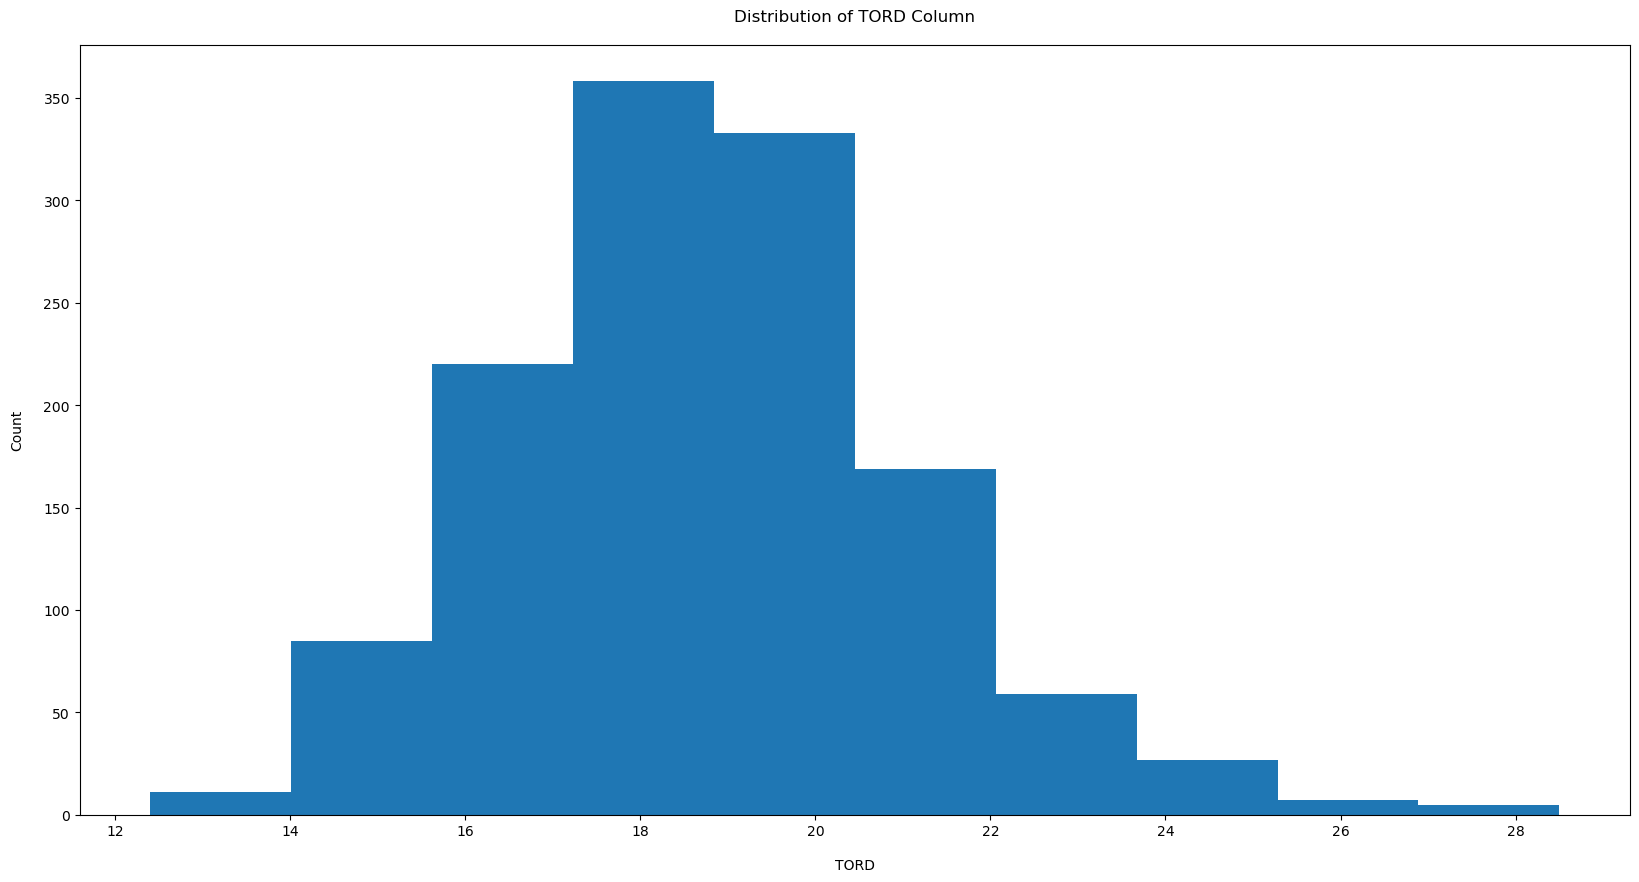

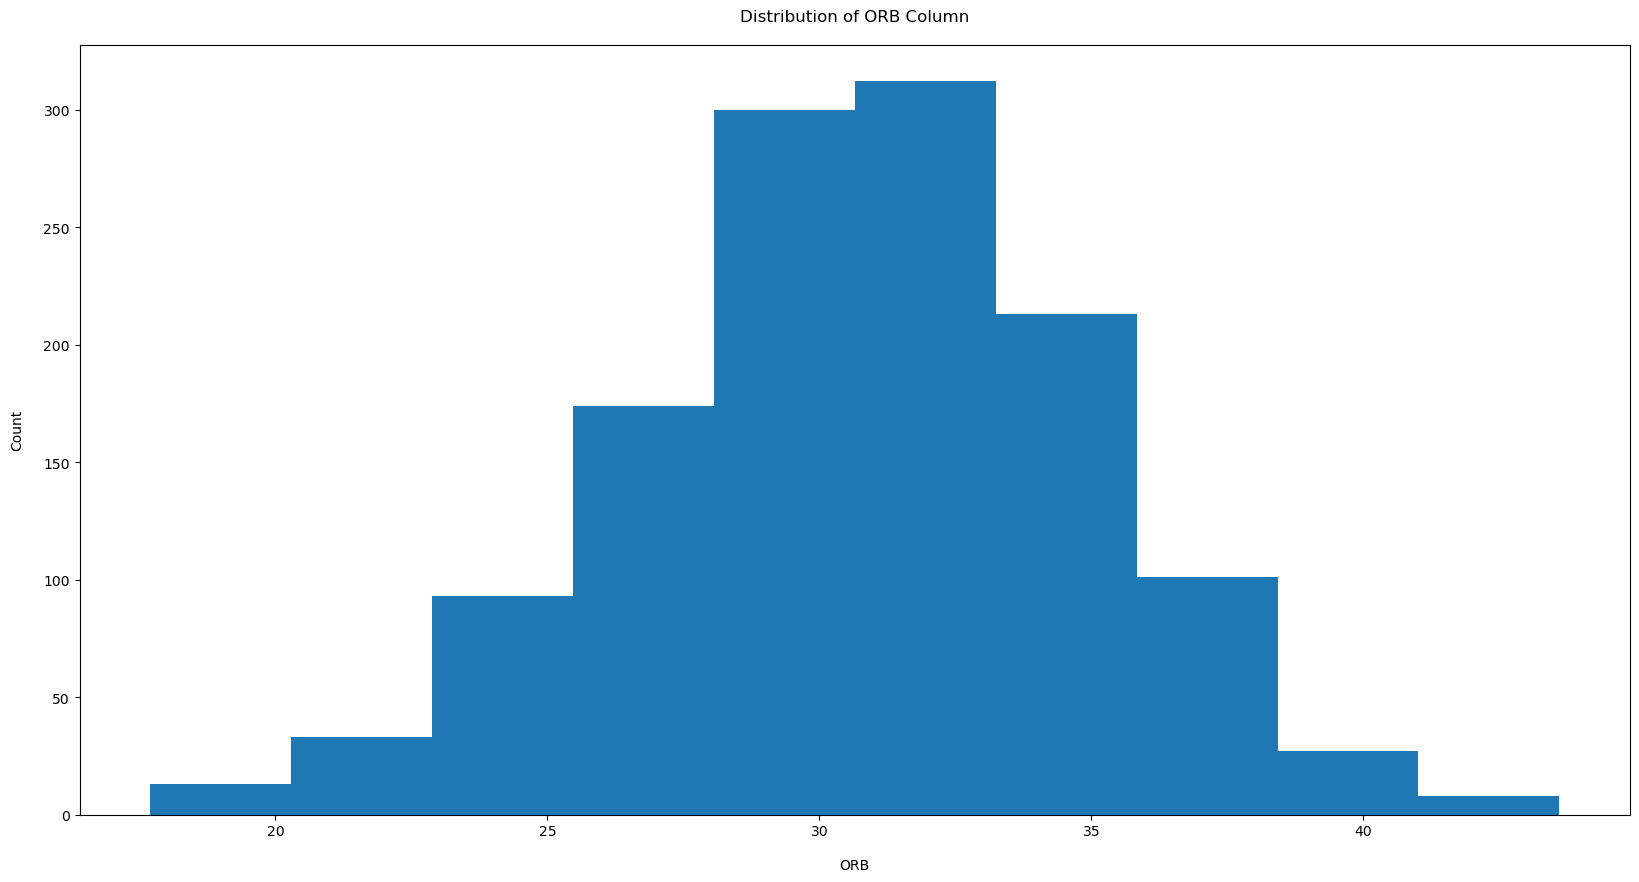

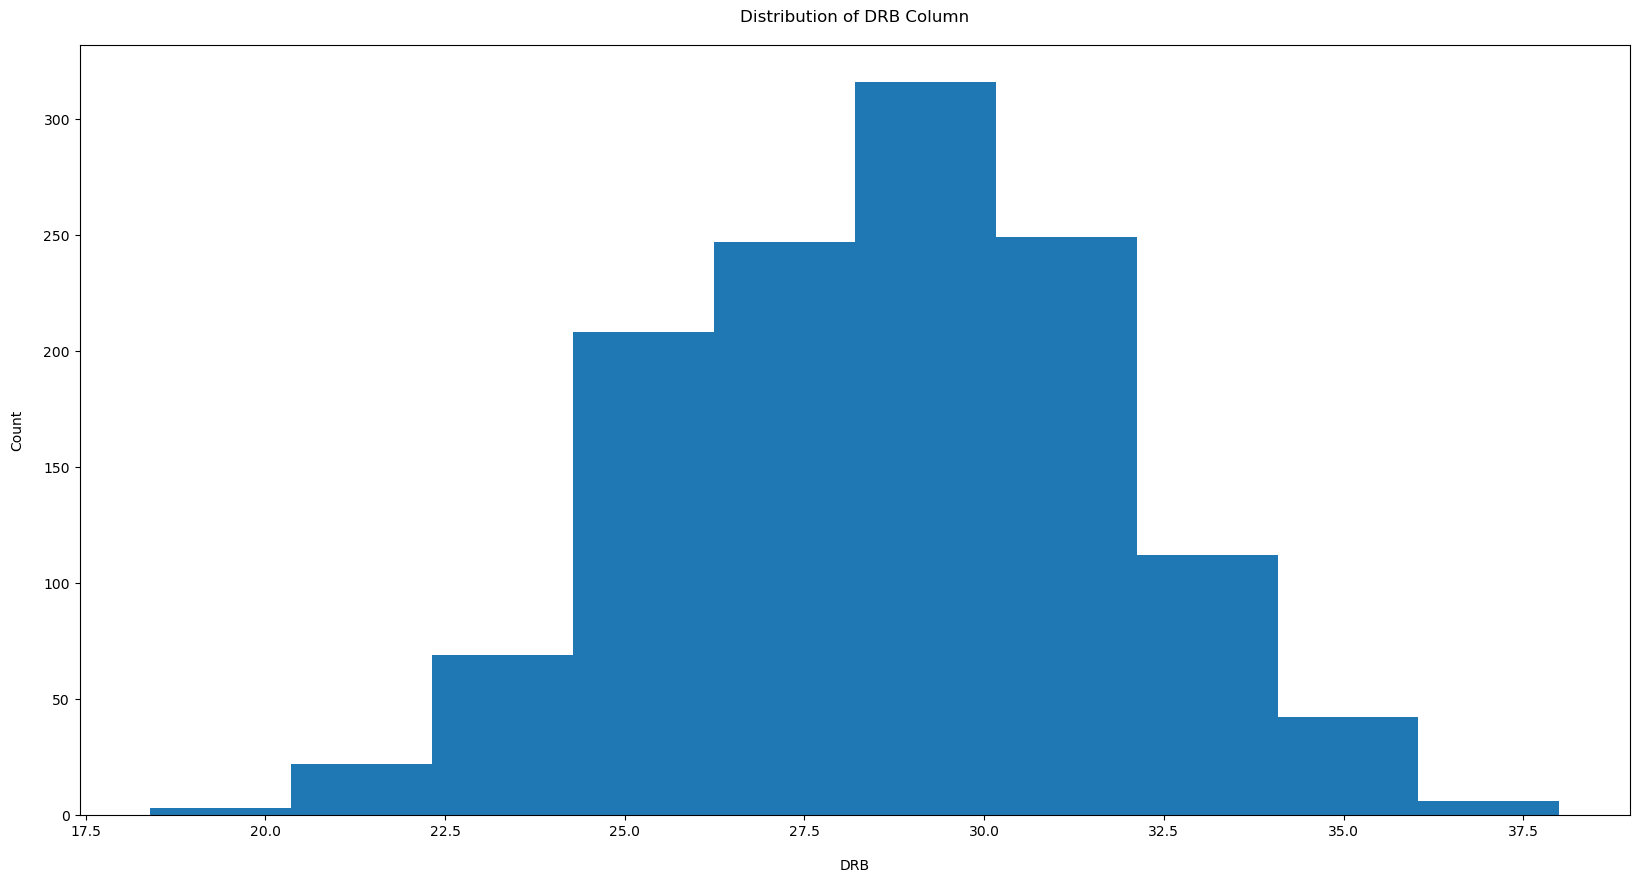

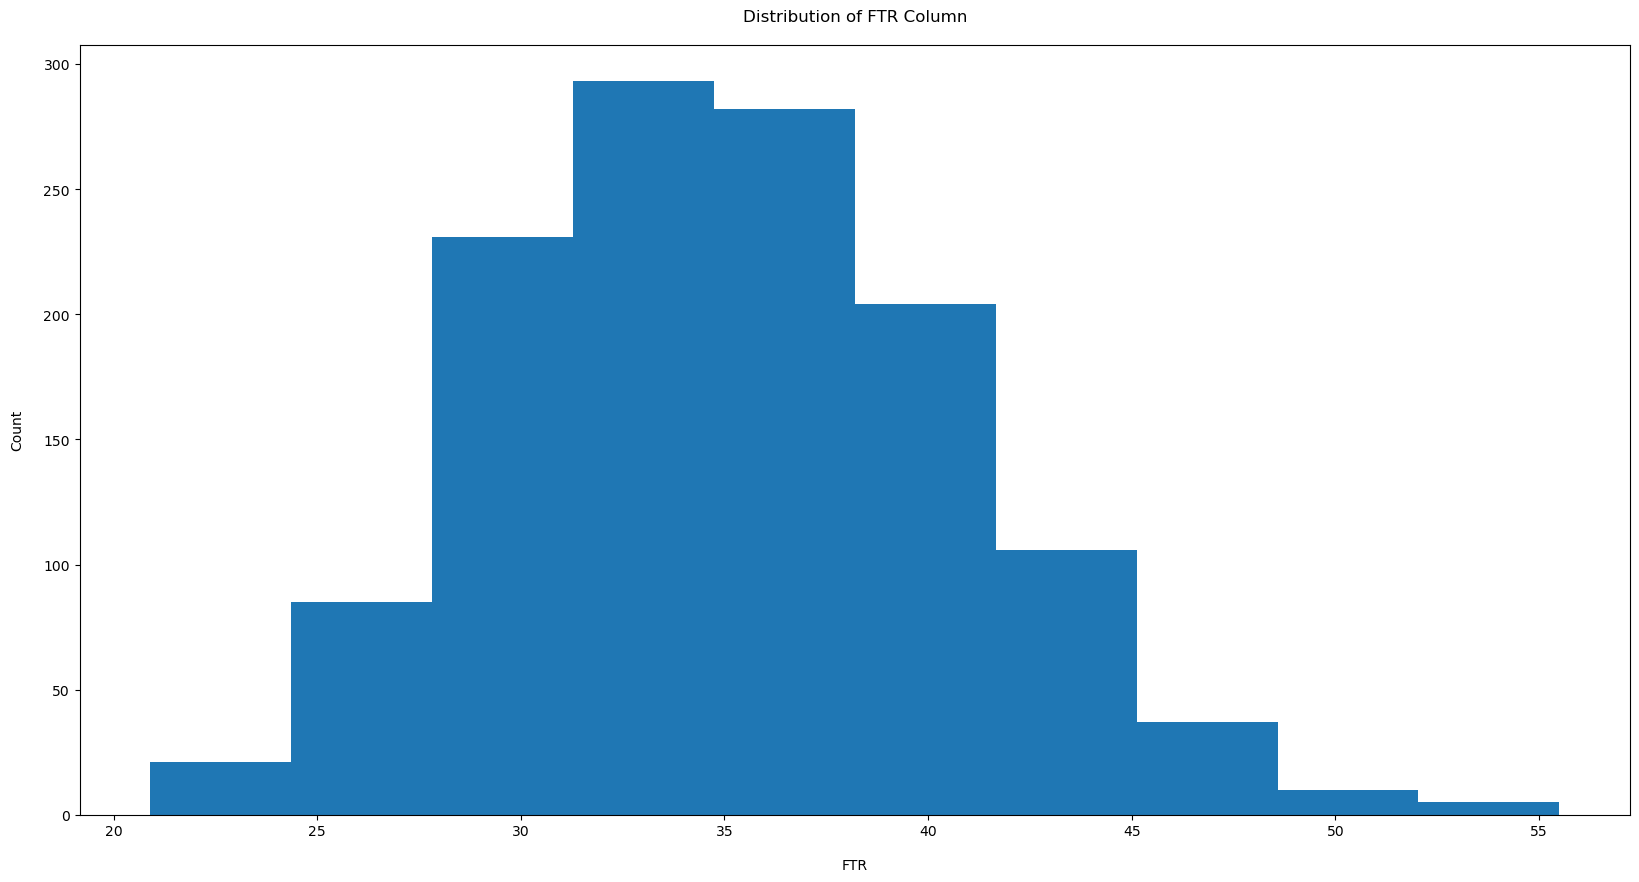

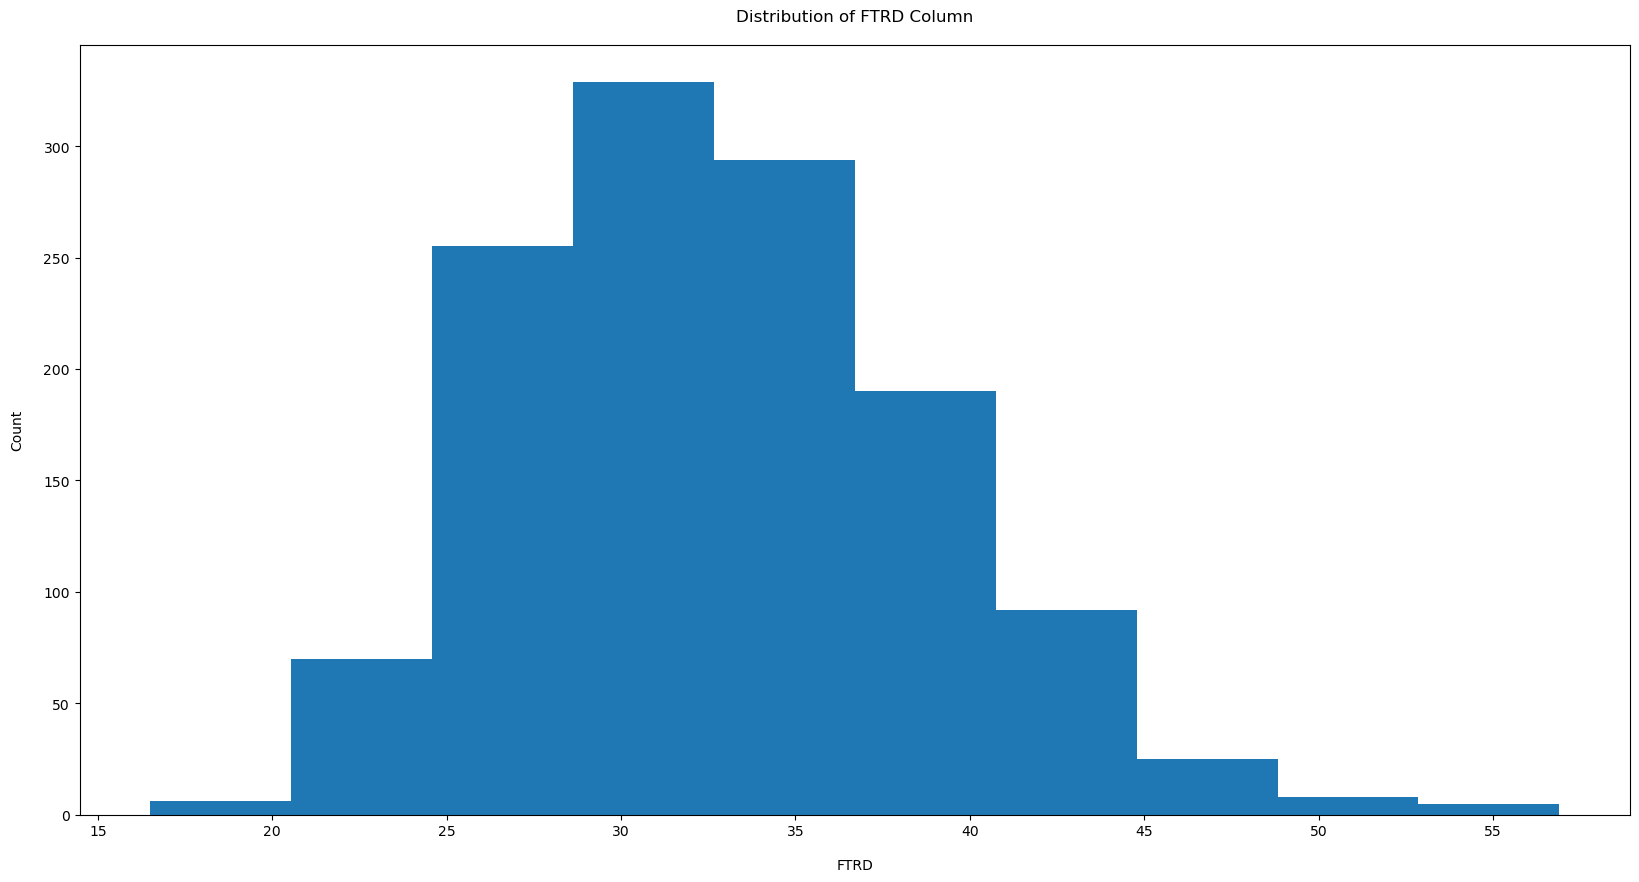

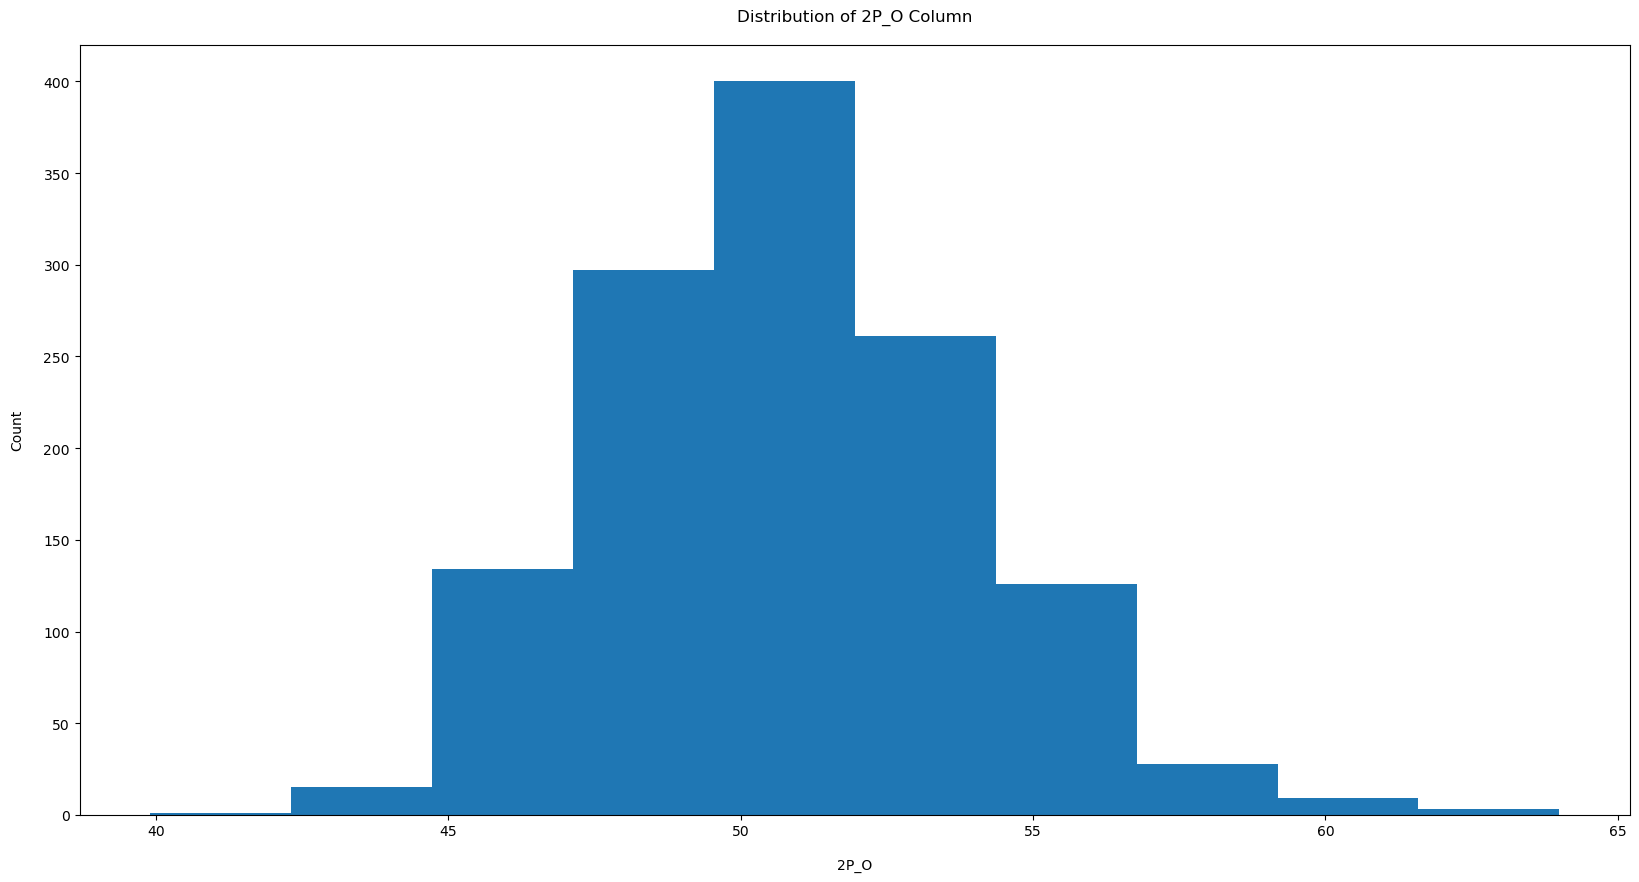

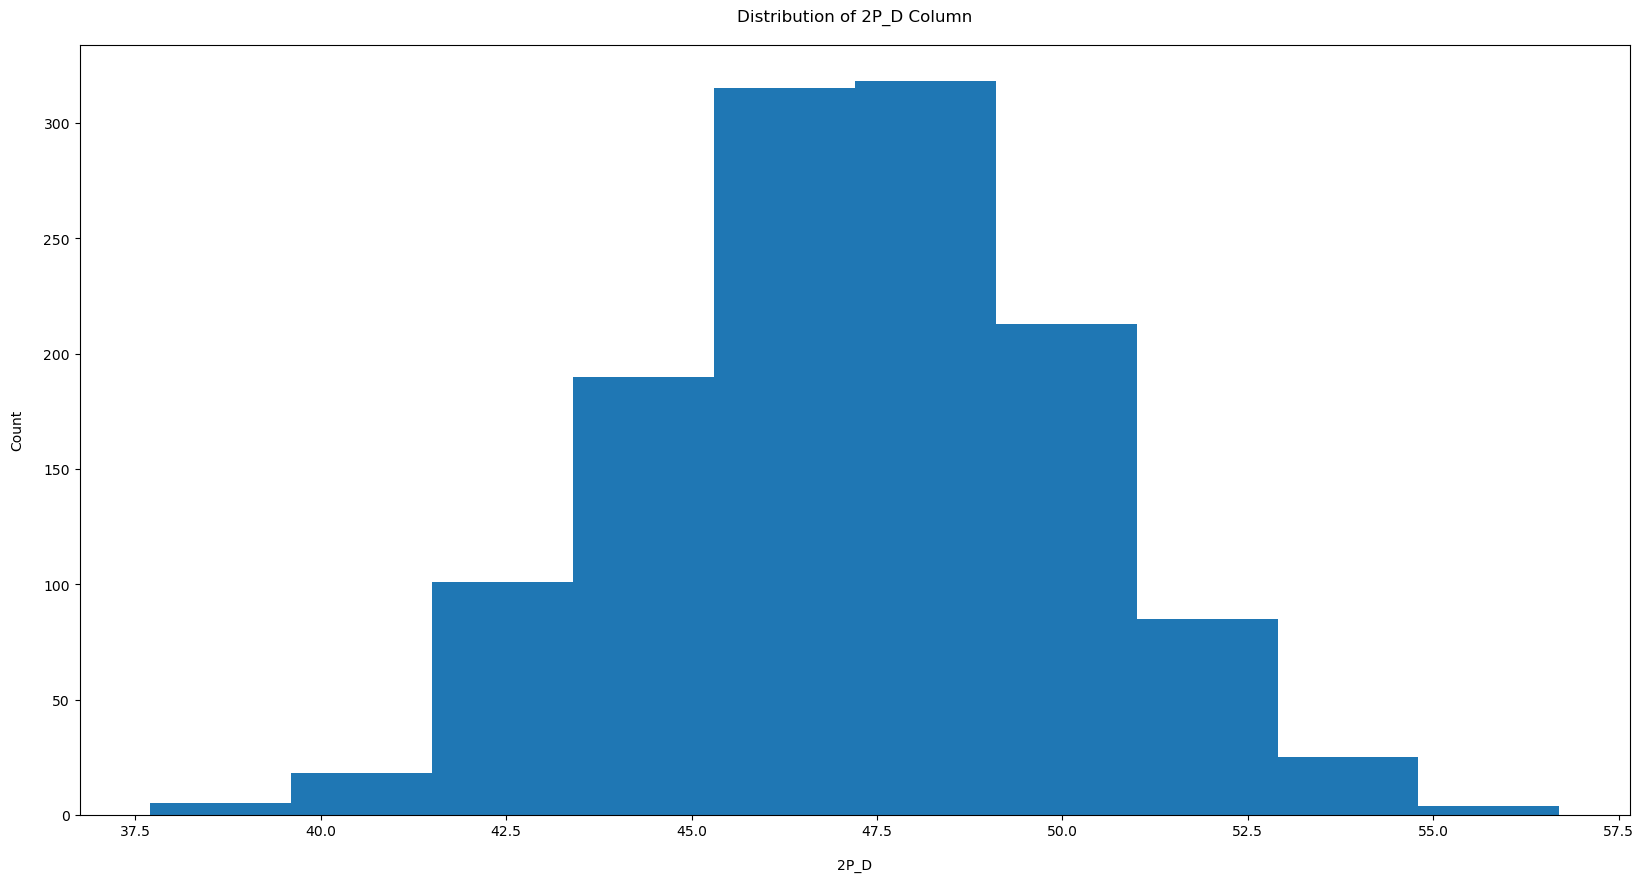

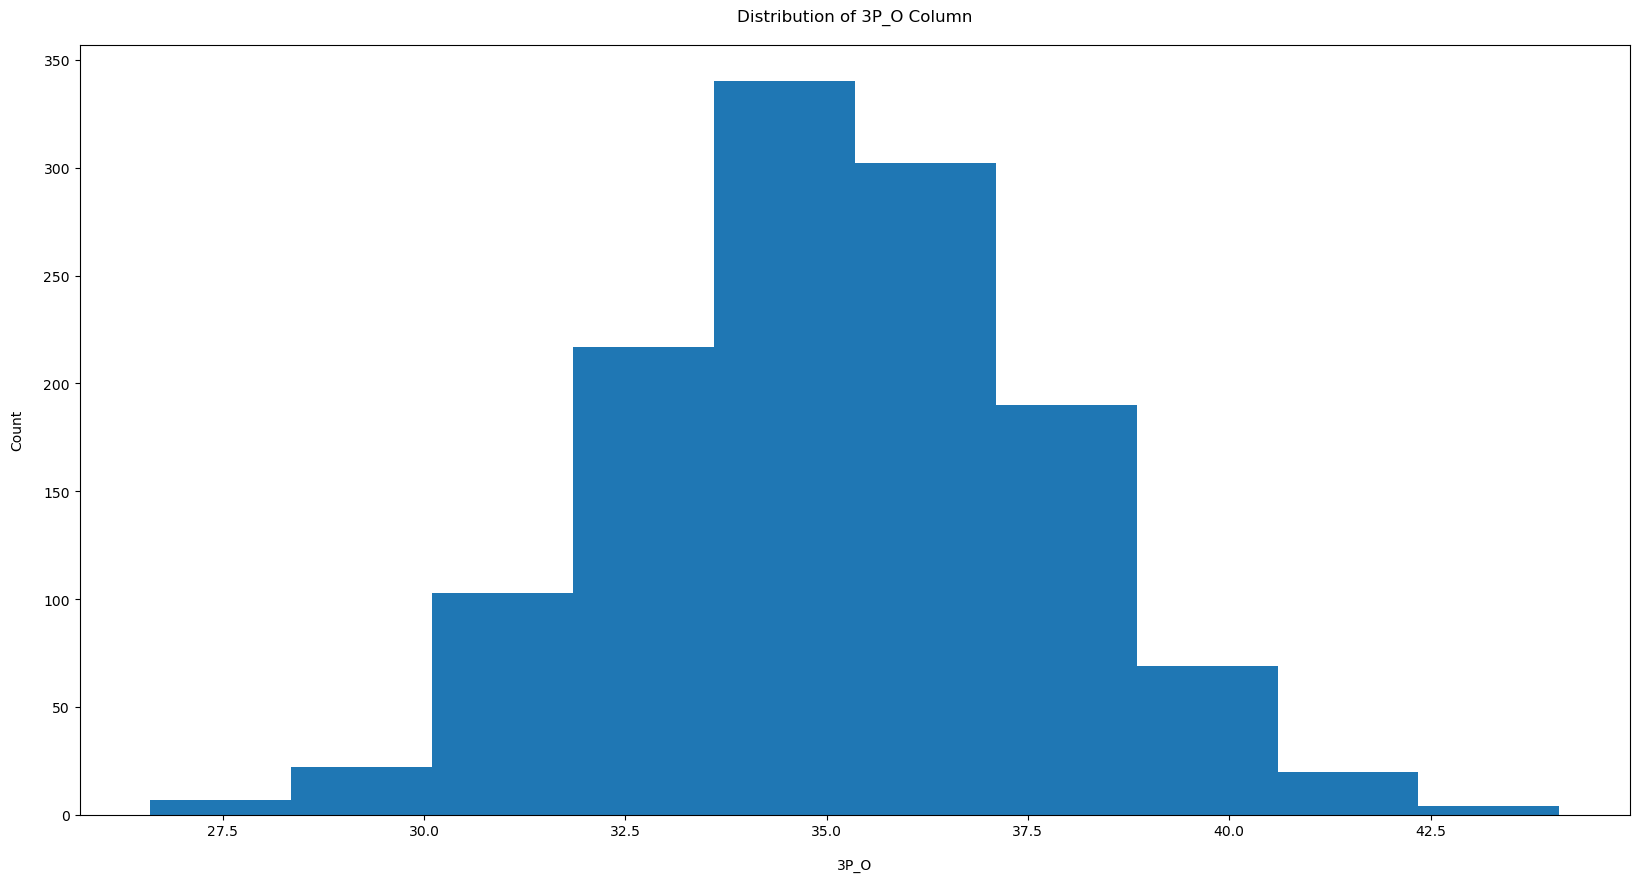

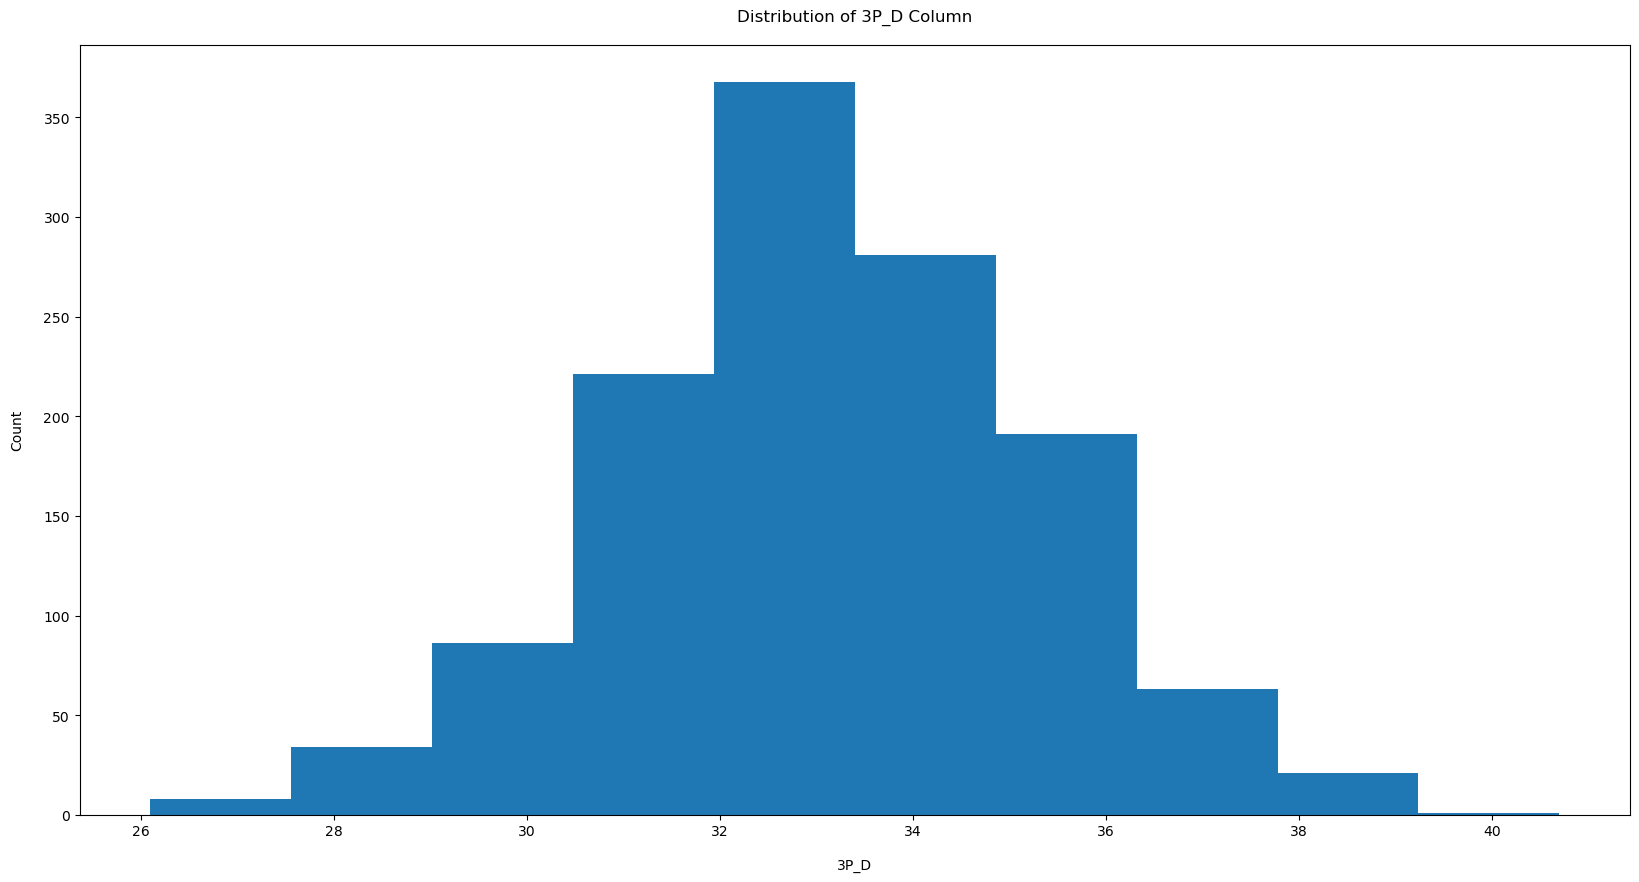

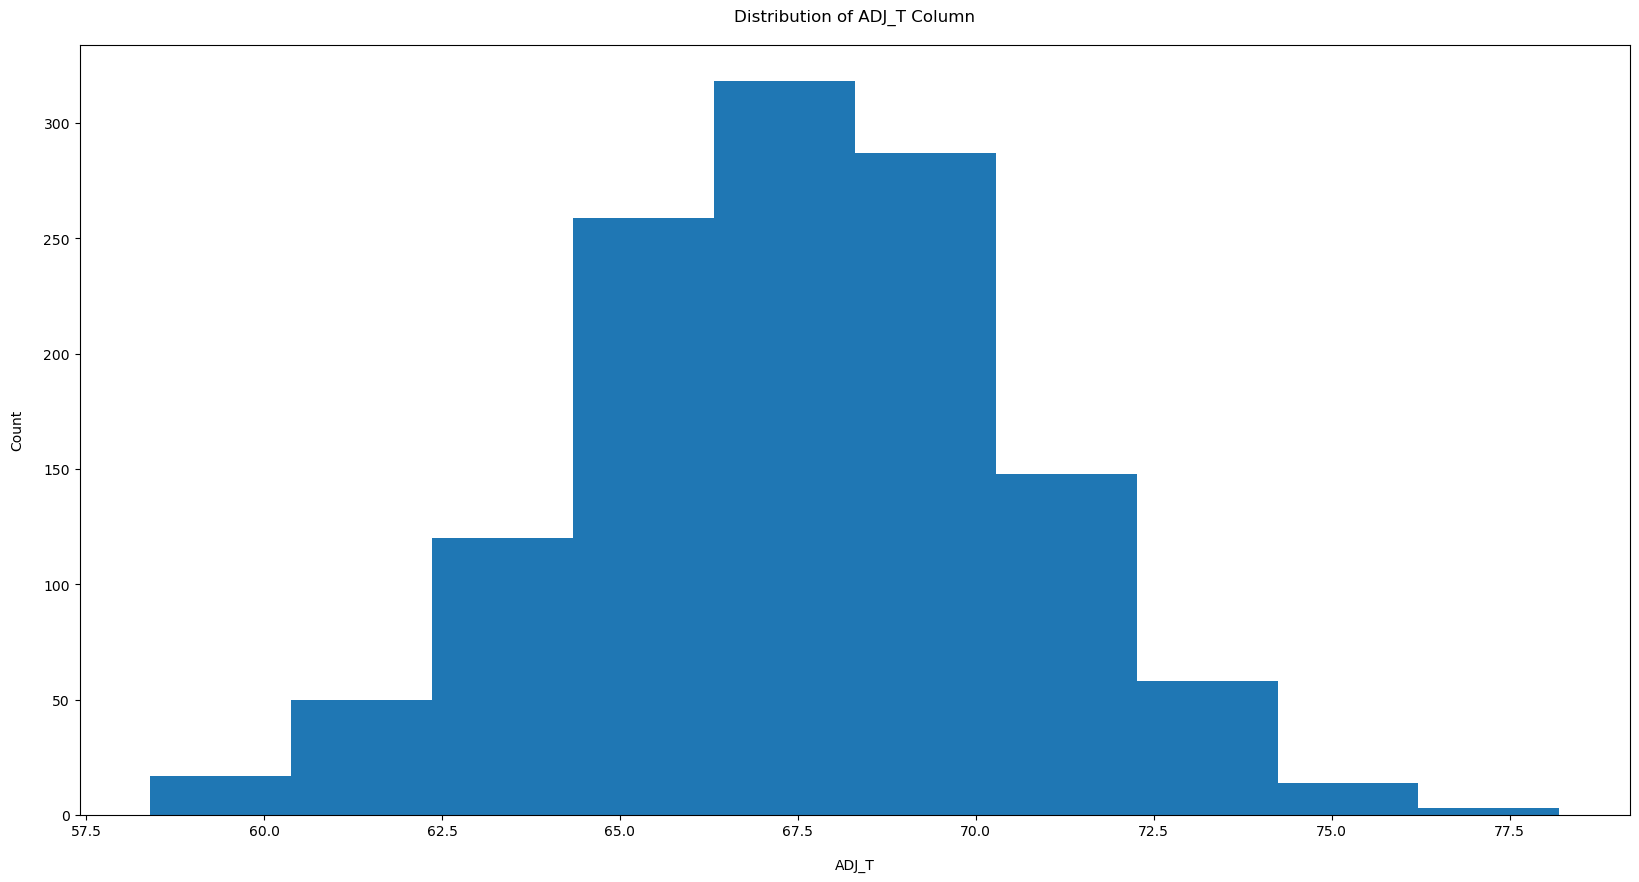

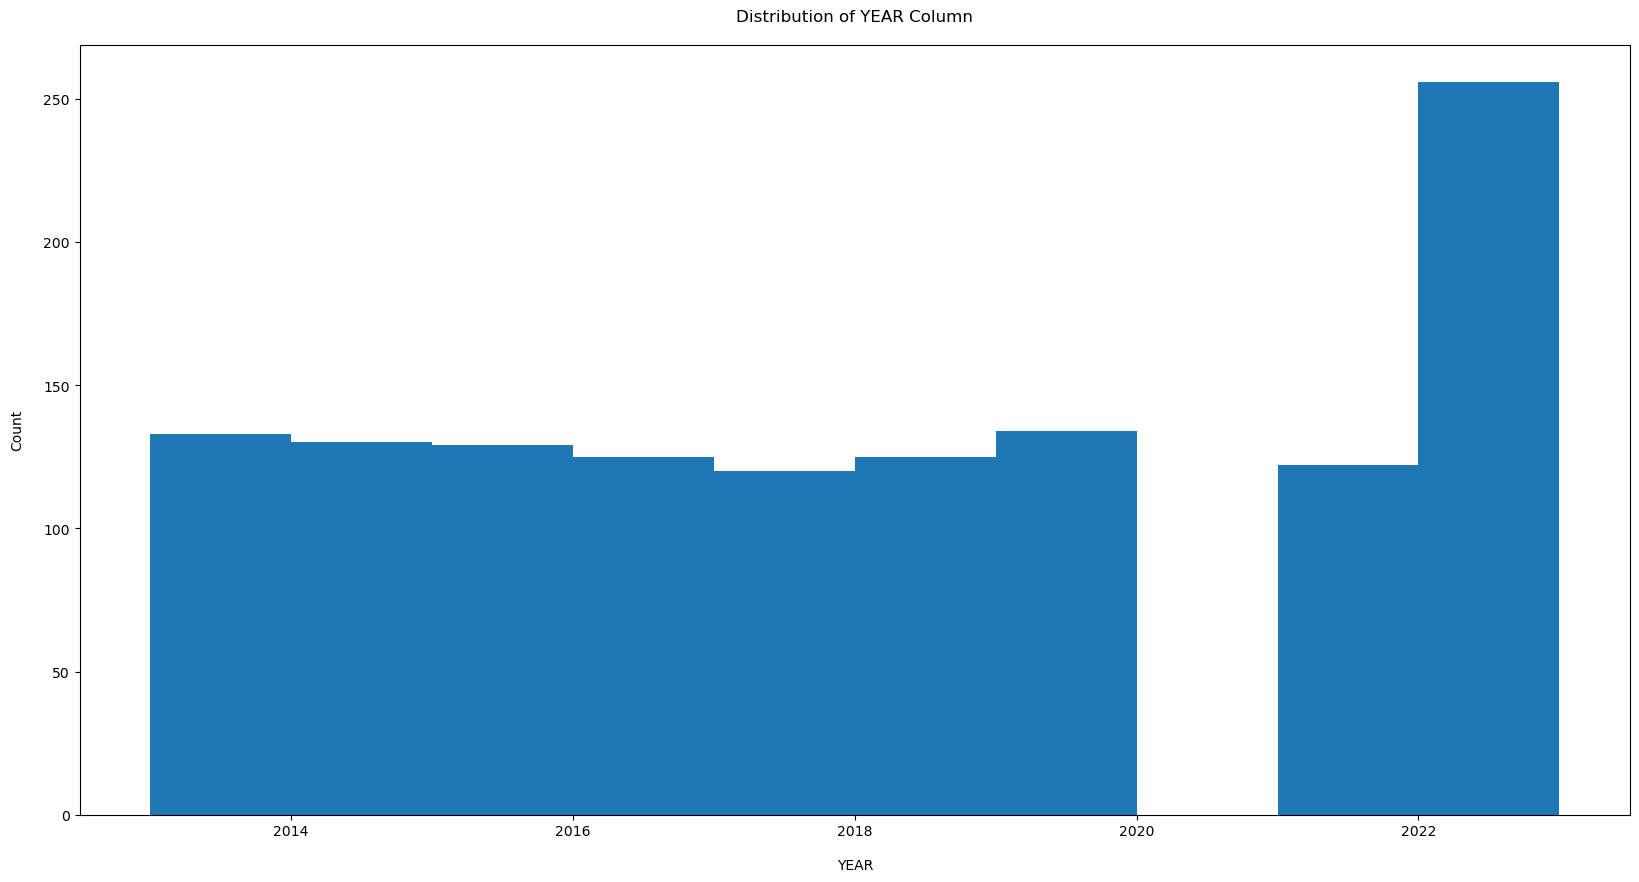

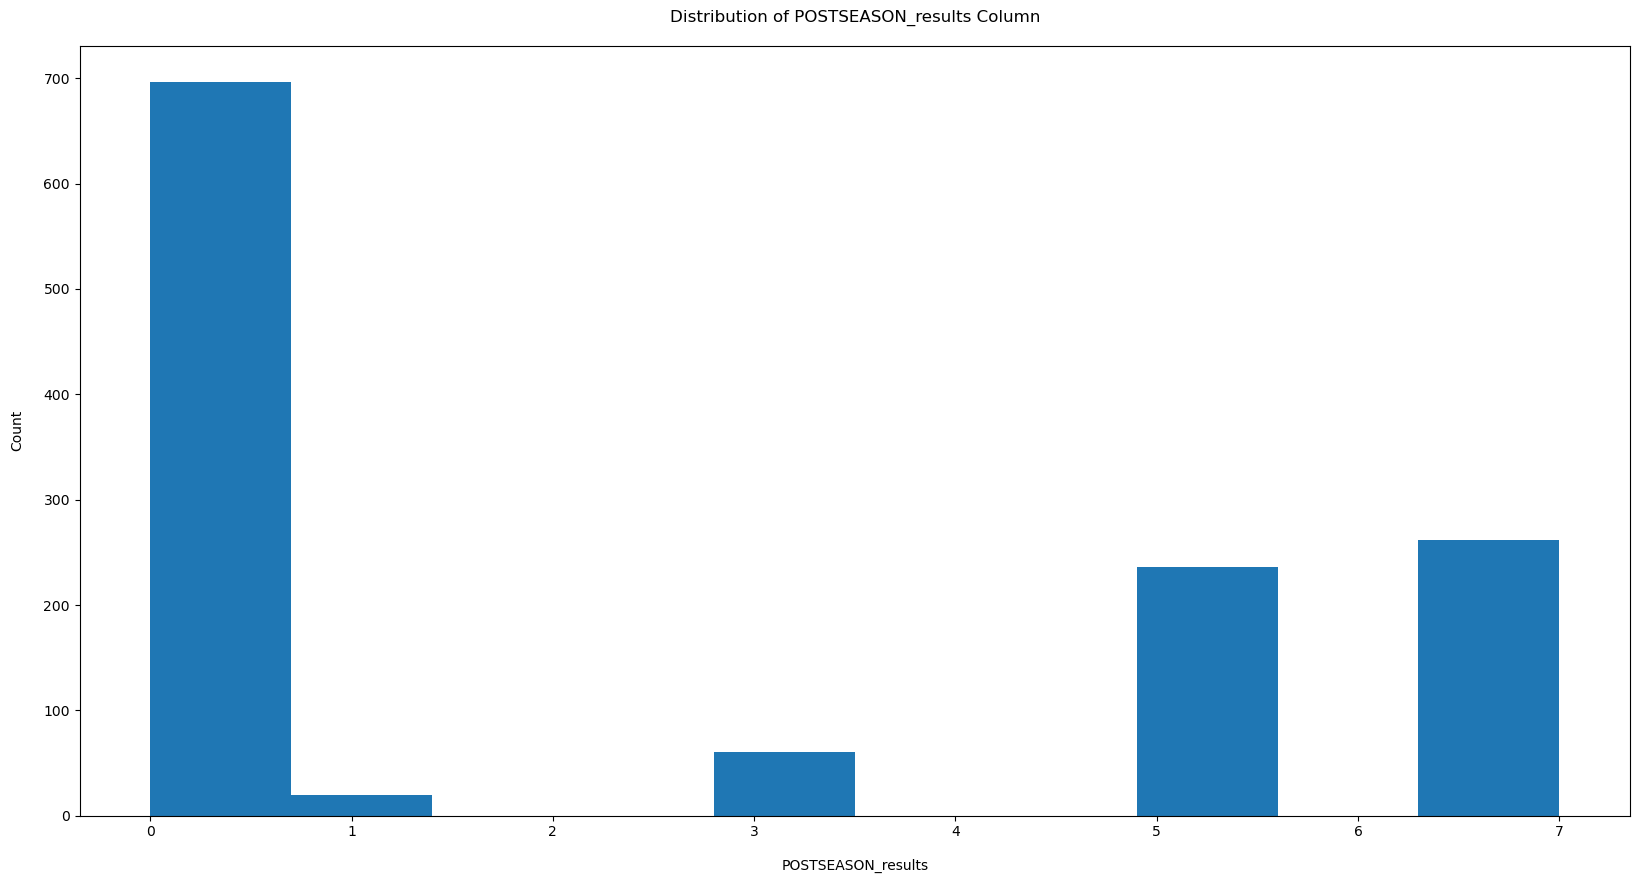

In [201]:
for col in cleanedDf:
    makeHistogram(cleanedDf, col, 20, 10)

In [202]:
# lets first reset the index
featuresTrainCleanedDF = cleanedDf.reset_index().drop(columns="index")

yDF = pd.DataFrame(featuresTrainCleanedDF["POSTSEASON_results"])

yDF.head()

,POSTSEASON_results
0,1
1,1
2,1
3,1
4,1


In [203]:
xDF = featuresTrainCleanedDF.drop(columns=["POSTSEASON_results", "YEAR"])

xDF.head()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T
0,40,33,123.3,94.9,95.31,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7
1,40,36,129.1,93.6,97.58,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3
2,40,33,114.4,90.4,93.75,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9
3,38,31,115.2,85.2,96.96,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5
4,39,37,117.8,86.3,97.28,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5


In [204]:
print(xDF.shape)
print(yDF.shape)

(1274, 18)
(1274, 1)


In [205]:
# split training and testing set
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xDF, 
                                                yDF,
                                                test_size = 0.3,
                                                shuffle=True)

xTrain.head()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T
1178,33,19,119.9,103.9,83.85,51.7,53.3,14.0,18.2,32.1,27.4,32.3,23.8,52.1,52.5,34.0,36.6,69.6
615,33,28,107.6,96.7,77.32,51.9,45.9,15.6,21.0,26.7,29.5,31.5,38.3,48.9,45.7,38.2,30.9,63.8
482,32,14,109.0,100.0,72.99,49.7,48.5,19.6,17.6,34.4,32.4,37.0,30.1,47.8,47.1,36.4,34.4,68.8
402,30,21,111.1,101.5,73.83,53.5,48.9,15.1,17.2,28.9,25.0,30.9,30.6,53.8,49.3,35.4,32.0,67.9
795,33,25,106.2,96.4,75.19,50.7,45.4,19.7,21.7,34.4,33.3,55.5,52.8,48.7,44.0,36.9,32.7,69.6


In [206]:
# Standardization
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()


# Standardize the feature variables
xTrain_scaled = xScaler.fit_transform(xTrain)

# Convert the standardized features back to a DataFrame
xTrain_scaled = pd.DataFrame(xTrain_scaled, columns=xTrain.columns)

# View the standardized feature variables
print(xTrain_scaled.head())

          G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
0  0.116404 -0.436120  1.883165  1.608415  0.528802  0.083112  2.292421   
1  0.116404  1.229235 -0.445490 -0.085777 -0.099811  0.155678 -0.969166   
2 -0.157253 -1.361317 -0.180440  0.690728 -0.516641 -0.642543  0.176797   
3 -0.704566 -0.066041  0.217135  1.043685 -0.435778  0.736202  0.353099   
4  0.116404  0.674117 -0.710540 -0.156368 -0.304857 -0.279715 -1.189544   

        TOR      TORD       ORB       DRB       FTR      FTRD      2P_O  \
0 -2.024119 -0.240744  0.338557 -0.412218 -0.503076 -1.506058  0.411924   
1 -1.156457  0.962155 -0.944674  0.278850 -0.645566  0.955704 -0.611496   
2  1.012699 -0.498508  0.885118  1.233183  0.334058 -0.436465 -0.963297   
3 -1.427601 -0.670350 -0.421876 -1.202011 -0.752435 -0.351577  0.955615   
4  1.066928  1.262879  0.885118  1.529355  3.629157  3.417466 -0.675460   

       2P_D      3P_O      3P_D     ADJ_T  
0  1.942744 -0.435589  1.584584  0.715267  
1 -0.52444

In [207]:
with open("xScaler.pkl", 'wb') as f:
    pickle.dump(xScaler, f)



In [208]:
colNames = xTrain.columns.values.tolist()

# Apply transformation to testing features data
xTest[colNames] = xScaler.transform(xTest[colNames])

# Get column names of the training target variable
colNames = yTrain.columns.values.tolist()

# Assign values of yDF to yTest
yTest[colNames] = yDF

# View the scaled testing features data
print(xTest.head())

             G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
191   0.116404 -0.436120 -0.426558  0.996624 -1.117337 -0.170867  0.926080   
11    2.031999  2.709551  3.492398 -0.697568  1.818759  2.913168  0.176797   
788   0.390060  0.118998  0.728304  0.808380  0.233267 -0.315998  0.441250   
1227  0.116404 -0.621159 -0.388693  0.149528 -0.257687 -0.751391  0.926080   
675   0.390060 -0.251080  0.557914 -0.932872  1.142976 -0.207150 -0.616562   

           TOR      TORD       ORB       DRB       FTR      FTRD      2P_O  \
191   0.090808 -1.056996 -0.374349 -0.807114  0.547794 -0.402510 -0.387623   
11   -1.481830 -0.240744 -0.255531 -0.510942 -1.019605 -1.013706  2.618672   
788  -1.319144 -0.928114  1.003936 -0.017322  2.222061  0.701039 -0.515551   
1227  0.524639  0.403666  0.790064 -0.346402 -1.322398 -0.521354 -0.483569   
675  -0.126108 -1.142917 -0.374349 -0.905838 -0.039981 -0.113889 -0.067804   

          2P_D      3P_O      3P_D     ADJ_T  
191   0.890562 

In [209]:
yTrain.head()

,POSTSEASON_results
1178,7
615,5
482,0
402,0
795,7


In [210]:
yTest.head()

,POSTSEASON_results
191,0
11,1
788,7
1227,0
675,7


In [211]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Define custom class weights
class_weights = {
    0: 1,  # Class 0
    1: 9,  # Class 1 (more interested)
    2: 4,  # Class 2
    3: 3,  # Class 3
    4: 2,  # Class 4
    5: 1,  # Class 5
    6: 1,  # Class 6
    7: 1,  # Class 7
}

# Instantiate your classifier with class weights
clf = RandomForestClassifier(class_weight=class_weights)

# Train your classifier on your data
clf.fit(xTrain, yTrain)

# Make predictions on the testing set
preds = clf.predict(xTest)

# Evaluate model performance
accuracy = accuracy_score(yTest, preds)
print("Accuracy:", accuracy)

# Additional classification metrics
print("Classification Report:")
print(classification_report(yTest, preds))

print("Confusion Matrix:")
print(confusion_matrix(yTest, preds))



c:\Users\jorda\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5300261096605744
Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       203
           1       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        69
           7       0.00      0.00      0.00        88

    accuracy                           0.53       383
   macro avg       0.11      0.20      0.14       383
weighted avg       0.28      0.53      0.37       383

Confusion Matrix:
[[203   0   0   0   0]
 [  7   0   0   0   0]
 [ 16   0   0   0   0]
 [ 69   0   0   0   0]
 [ 88   0   0   0   0]]


c:\Users\jorda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jorda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jorda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
